# Beginning With Raw Calibrator Data: Derive the SCUBA-2 FCFs

This notebook illustrates and summarises the compilation of some of the more important codes and testing I have been doing for the past few months whenever I have had time to address the SCUBA-2 FCF issue.

Here is a basic summary:

1. Finding Physical Opacity Relations to Test
1. Finding the Optimal Opacity Relation for each wavelength out of that physical set
1. Measuring the Peak and Arcsec FCFs for each wavelength (all data)
1. Applying sensible constraints to the data and recognising different times of night/weather make differences
1. Looking at the data taken while the membrane was removed
1. Comparing the pre-membrane-removal and post-membrane-replacement data 
1. Looking at other metrics such as beam size/shape

# Finding a set of physical opacity relations

I extracted PWV versus Transmission data from the CSO interactive plotter and saved that information for each wavelength

I then built two functions that, together, interpolate over that data and return a ZENITH transmission value for a given input tau225 (Part of a larger package called TauRelAnalysis.py which is in this working directory).

`FitCSOTransvsPWV.py`: This code takes the tabular information from the CSO interactive plotter and constructs a Transmission versus PWV Function

`CSOtrans.py`: This code takes an input tau225 value, converts it to a PWV using the relations:

PWVzen = (tau225zen - 0.017) / 0.04 ----- From Dempsey et al. 2013

and then uses the Transmission versus PWV Function to return a zenith transmission.

Then, I built a function to generate physically likely opacity relations:

`phystau.py`: You supply a range of "a" and "b" values to convert the tau225 values into tau345 (850 microns) and tau666 (450 microns):

tauX = a(tau225 - b)

Then, the code genrates a transmission for every combination of a and b value, tau225 value between 0.03 and 0.20 (you choose the step size), and airmass between 1.0 and 2.0 (you choose the step size). 

transmission = exp(-tauX x airmass)

The code then compares this calculated transmission to the expected transmission for all (tau x airmass) values and all combinations of a and b (the proper airmass correction is made for the expected transmission from the CSO data). We can then determine which a and b combinations give us physical transmissions across all the weather bands we are interested in.  

The biggest time sink is the construction of the TRANSvsPWV function. I have recently been told that there are ways to access the ATM model that CASA uses with starlink - that might be worth a try as well.

In [1]:
#Ensure plots show up in the notebook

%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (9,9)

In [2]:
# Run phystau for both 450 and 850 microns and display a couple of examples:
from find_physical_tau_relations_clean import phystau

a450ST   = 19 
a450EN   = 30
a450step = 0.5

b450ST   = 0.006
b450EN   = 0.018
b450step = 0.002

a850ST   = 4.0 
a850EN   = 5.7
a850step = 0.1

b850ST   = 0.004
b850EN   = 0.015
b850step = 0.0002

param_num  = 100.0
physthresh = 0.05


phystau(a450ST,a450EN,a450step,b450ST,b450EN,b450step,450,physthresh,param_num)
phystau(a850ST,a850EN,a850step,b850ST,b850EN,b850step,850,physthresh,param_num)


 Working on Opacity Relation #1 out of 161


 Working on Opacity Relation #2 out of 161


 Working on Opacity Relation #3 out of 161


 Working on Opacity Relation #4 out of 161


 Working on Opacity Relation #5 out of 161


 Working on Opacity Relation #6 out of 161


 Working on Opacity Relation #7 out of 161


 Working on Opacity Relation #8 out of 161


 Working on Opacity Relation #9 out of 161


 Working on Opacity Relation #10 out of 161


 Working on Opacity Relation #11 out of 161


 Working on Opacity Relation #12 out of 161


 Working on Opacity Relation #13 out of 161


 Working on Opacity Relation #14 out of 161


 Working on Opacity Relation #15 out of 161


 Working on Opacity Relation #16 out of 161


 Working on Opacity Relation #17 out of 161


 Working on Opacity Relation #18 out of 161


 Working on Opacity Relation #19 out of 161


 Working on Opacity Relation #20 out of 161


 Working on Opacity Relation #21 out of 161


 Working on Opacity Relation #22 out of 16


 Working on Opacity Relation #18 out of 1008


 Working on Opacity Relation #19 out of 1008


 Working on Opacity Relation #20 out of 1008


 Working on Opacity Relation #21 out of 1008


 Working on Opacity Relation #22 out of 1008


 Working on Opacity Relation #23 out of 1008


 Working on Opacity Relation #24 out of 1008


 Working on Opacity Relation #25 out of 1008


 Working on Opacity Relation #26 out of 1008


 Working on Opacity Relation #27 out of 1008


 Working on Opacity Relation #28 out of 1008


 Working on Opacity Relation #29 out of 1008


 Working on Opacity Relation #30 out of 1008


 Working on Opacity Relation #31 out of 1008


 Working on Opacity Relation #32 out of 1008


 Working on Opacity Relation #33 out of 1008


 Working on Opacity Relation #34 out of 1008


 Working on Opacity Relation #35 out of 1008


 Working on Opacity Relation #36 out of 1008


 Working on Opacity Relation #37 out of 1008


 Working on Opacity Relation #38 out of 1008


 Working on 


 Working on Opacity Relation #191 out of 1008


 Working on Opacity Relation #192 out of 1008


 Working on Opacity Relation #193 out of 1008


 Working on Opacity Relation #194 out of 1008


 Working on Opacity Relation #195 out of 1008


 Working on Opacity Relation #196 out of 1008


 Working on Opacity Relation #197 out of 1008


 Working on Opacity Relation #198 out of 1008


 Working on Opacity Relation #199 out of 1008


 Working on Opacity Relation #200 out of 1008


 Working on Opacity Relation #201 out of 1008


 Working on Opacity Relation #202 out of 1008


 Working on Opacity Relation #203 out of 1008


 Working on Opacity Relation #204 out of 1008


 Working on Opacity Relation #205 out of 1008


 Working on Opacity Relation #206 out of 1008


 Working on Opacity Relation #207 out of 1008


 Working on Opacity Relation #208 out of 1008


 Working on Opacity Relation #209 out of 1008


 Working on Opacity Relation #210 out of 1008


 Working on Opacity Relation #211 out o


 Working on Opacity Relation #362 out of 1008


 Working on Opacity Relation #363 out of 1008


 Working on Opacity Relation #364 out of 1008


 Working on Opacity Relation #365 out of 1008


 Working on Opacity Relation #366 out of 1008


 Working on Opacity Relation #367 out of 1008


 Working on Opacity Relation #368 out of 1008


 Working on Opacity Relation #369 out of 1008


 Working on Opacity Relation #370 out of 1008


 Working on Opacity Relation #371 out of 1008


 Working on Opacity Relation #372 out of 1008


 Working on Opacity Relation #373 out of 1008


 Working on Opacity Relation #374 out of 1008


 Working on Opacity Relation #375 out of 1008


 Working on Opacity Relation #376 out of 1008


 Working on Opacity Relation #377 out of 1008


 Working on Opacity Relation #378 out of 1008


 Working on Opacity Relation #379 out of 1008


 Working on Opacity Relation #380 out of 1008


 Working on Opacity Relation #381 out of 1008


 Working on Opacity Relation #382 out o


 Working on Opacity Relation #533 out of 1008


 Working on Opacity Relation #534 out of 1008


 Working on Opacity Relation #535 out of 1008


 Working on Opacity Relation #536 out of 1008


 Working on Opacity Relation #537 out of 1008


 Working on Opacity Relation #538 out of 1008


 Working on Opacity Relation #539 out of 1008


 Working on Opacity Relation #540 out of 1008


 Working on Opacity Relation #541 out of 1008


 Working on Opacity Relation #542 out of 1008


 Working on Opacity Relation #543 out of 1008


 Working on Opacity Relation #544 out of 1008


 Working on Opacity Relation #545 out of 1008


 Working on Opacity Relation #546 out of 1008


 Working on Opacity Relation #547 out of 1008


 Working on Opacity Relation #548 out of 1008


 Working on Opacity Relation #549 out of 1008


 Working on Opacity Relation #550 out of 1008


 Working on Opacity Relation #551 out of 1008


 Working on Opacity Relation #552 out of 1008


 Working on Opacity Relation #553 out o


 Working on Opacity Relation #704 out of 1008


 Working on Opacity Relation #705 out of 1008


 Working on Opacity Relation #706 out of 1008


 Working on Opacity Relation #707 out of 1008


 Working on Opacity Relation #708 out of 1008


 Working on Opacity Relation #709 out of 1008


 Working on Opacity Relation #710 out of 1008


 Working on Opacity Relation #711 out of 1008


 Working on Opacity Relation #712 out of 1008


 Working on Opacity Relation #713 out of 1008


 Working on Opacity Relation #714 out of 1008


 Working on Opacity Relation #715 out of 1008


 Working on Opacity Relation #716 out of 1008


 Working on Opacity Relation #717 out of 1008


 Working on Opacity Relation #718 out of 1008


 Working on Opacity Relation #719 out of 1008


 Working on Opacity Relation #720 out of 1008


 Working on Opacity Relation #721 out of 1008


 Working on Opacity Relation #722 out of 1008


 Working on Opacity Relation #723 out of 1008


 Working on Opacity Relation #724 out o


 Working on Opacity Relation #875 out of 1008


 Working on Opacity Relation #876 out of 1008


 Working on Opacity Relation #877 out of 1008


 Working on Opacity Relation #878 out of 1008


 Working on Opacity Relation #879 out of 1008


 Working on Opacity Relation #880 out of 1008


 Working on Opacity Relation #881 out of 1008


 Working on Opacity Relation #882 out of 1008


 Working on Opacity Relation #883 out of 1008


 Working on Opacity Relation #884 out of 1008


 Working on Opacity Relation #885 out of 1008


 Working on Opacity Relation #886 out of 1008


 Working on Opacity Relation #887 out of 1008


 Working on Opacity Relation #888 out of 1008


 Working on Opacity Relation #889 out of 1008


 Working on Opacity Relation #890 out of 1008


 Working on Opacity Relation #891 out of 1008


 Working on Opacity Relation #892 out of 1008


 Working on Opacity Relation #893 out of 1008


 Working on Opacity Relation #894 out of 1008


 Working on Opacity Relation #895 out o

[(4.299999999999999, 0.004),
 (4.299999999999999, 0.0042),
 (4.299999999999999, 0.004399999999999999),
 (4.299999999999999, 0.004599999999999999),
 (4.299999999999999, 0.004799999999999999),
 (4.299999999999999, 0.004999999999999998),
 (4.399999999999999, 0.004),
 (4.399999999999999, 0.0042),
 (4.399999999999999, 0.004399999999999999),
 (4.399999999999999, 0.004599999999999999),
 (4.399999999999999, 0.004799999999999999),
 (4.399999999999999, 0.004999999999999998),
 (4.399999999999999, 0.005199999999999998),
 (4.399999999999999, 0.005399999999999998),
 (4.399999999999999, 0.005599999999999997),
 (4.399999999999999, 0.005799999999999997),
 (4.399999999999999, 0.005999999999999997),
 (4.399999999999999, 0.006199999999999996),
 (4.399999999999999, 0.006399999999999996),
 (4.399999999999999, 0.006599999999999996),
 (4.399999999999999, 0.006799999999999995),
 (4.399999999999999, 0.006999999999999995),
 (4.399999999999999, 0.007199999999999995),
 (4.399999999999999, 0.007399999999999994),
 (

In [6]:
from IPython.display import IFrame

# A bad opacity relation:

IFrame("Figures/bad_OR_example.pdf", width=600, height=600)

Note the Y-axis is the expected transmission from the CSO interactive plotter minus the calculated transmission from the header information (WVMTAU and Airmass) and the given "a" and "b" values. I would expect a choice of "a" and "b" that returns "realistic" transmission values (those close to the transmission values calculated by the CSO interactive plotter). The Y-axis is in percent (since transmission is in percent). I would expect values to lay within +/- 5% of the CSO calculations. Therefore, the selected "a" and "b" values above are "not realistic" whereas the selected "a" and "b" values below are "realistic" for Maunakea.

In [7]:
from IPython.display import IFrame

# A good opacity relation (the points outside of the 0.05 "physical" threshold
# are in extremely good grade 1 weather at a low Airmass):

IFrame("Figures/good_OR_example.pdf", width=600, height=600)

# Deriving the Optimal Opacity relation at Each Wavelength

Now that I had a set of plausible set of physical opacity relations (pairs of "a" and "b" values which reproduced the CSO's  model Maunakea transmission for a given tau x airmass), it was time to find the optimal physical (a,b) combination that lead to the flattest Peak Flux and Total Flux versus Transmission curves.

I selected 3 main sources for this analysis:

1. Uranus
1. CRL618
1. CRL2688

Along with the less reliable

1. Mars
1. Neptune

I also looked at several different regimes:

1. The 20110501 - 20120601 Era from Dempsey et al. 2013
1. The 20120601 - 20150127 Era with the Silver WVM
1. The 20150127 - 20150410 Era with no reliable JCMT WVM 
1. The 20150410 - 20161116 Era with the Black WVM
1. The 20161116 - 20171206 Era with the Black WVM and the New Filters
1. The 20171206 - 20180111 Era with the removal of the goretex membrane
1. The 20180111 - 20180501 Post membrane Replacement to SMU Maintenance
1. The 20180501 - 20180630 Post SMU Maintenance to SMU Gain fix (halfway through night of 20180630 - see obs log)
1. The 20180630 - Present era.

The next code, `TauRelPipeline_NOEXT.py` relies on a variety of programs found in the `TauRelPrepFunctions.py` and `TauRelAnalysis_20171215.py` packages (also `get_noext_reductions_from_kamaka.py`, coded with Graham's help). The first has functions that crop images, find files, etc while the second one has functions which can read fits headers using .sdf file format and perform general analysis like running KAPPA's beamfit.

This code relies on a consistent reduction being performed nightly. Currently, there is a kamaka code that takes all the calibrator data and reduces it on 1 arcsecond pixels with NO EXTINCTION CORRECTION. The data is in pW and it has no extinction correction applied

This is the order of operations for `TauRelPipeline_NOEXT.py`:

1. Gather the reduced data that has no extinction correction or FCF factor applied
1. Select, from those, the source you are currently interested in
1. Construct the Transmission versus PWV function as before
1. For each pair of physical coefficients (a,b) and each calibrator observation:
    
    1. Get the tau225 from the header by averaging WVMTAUST and WVMTAUEN
    1. Get the airmass from the header, again by averaging AMSTART and AMEND over the short observation
    1. Calculate the transmission and compare it to the expected transmission
    1. Apply the new extinction correction (transmission) using CMULT
    1. Crop the image in order to run GaussClumps
    1. Fit the peak flux with GaussClumps and obtain the size & area of the calibrator
    1. Lay down a 1 arcminute diameter aperture centered on the calibrator and integrate the total flux

1. Save all the information for every (a,b) pair (size, location, peak flux, total flux, metadata, etc.)
1. Plot the Peak Flux versus Transmission for every calibrator observation and for every (a,b) extinction correction and fit a linear regression
1. Plot the Total Flux versus Transmission for every calibrator observation and for every (a,b) extinction correction and fit a linear regression
1. Find the shallowest slopes = the optimal (a,b)

Run the above for every source, both wavelengths, and both regimes


In [1]:
# Gather information on the peaks/total fluxes/ transmissions, etc. for all physical (a,b) coefficients
# for all the sources, both wavelengths, both regimes. Each of these
# produce a dictionary of timestamped results in a directory called "results"

# THIS TAKES A LONG TIME (typically 1-3 hours for each file run) 
# Each function call is specially set up to run a few optimal physical opacity relations
# I've run several more than I am presenting here, on finer grids, but these relations show you
# basically what is happening if we alter the a and b coefficients of the opacity relation.

#Lines that are commented out twice: ##, indicate instances where the pipeline is run on several different
#opacity relations at each wavelength. Single commented lines: #, run the pipeline for either 1 or 2
#optimal opacity relations derived from previous work. 

#############################
#############################
#############################
# YOU SHOULD ONLY EVER HAVE TO RUN THE UNCOMMENTED LINES FOR THE PRESENT EPOCH (which can be updated each day). 
# THE REST OF THE RESULTS HAVE ALREADY BEEN OBTAINED AND PLACED IN THE "results/" DIRECTORY.
#############################
#############################
#############################

from TauRelPipeline_NOEXT_faster import TauRelPipeline

######
# Dempsey Era: 20110501 -> 20120531
######                             

# 450

##TauRelPipeline('CRL2688',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20110501','20120601')
##TauRelPipeline('CRL618',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20110501','20120601') 
##TauRelPipeline('URANUS',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20110501','20120601') 
##TauRelPipeline('MARS',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20110501','20120601')   
###TauRelPipeline('ARP220',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20110501','20120601') # Processing issues on kamaka

#TauRelPipeline('CRL2688',[(26.0, 0.012)],'450','20110501','20120601')
#TauRelPipeline('CRL618',[(26.0, 0.012)],'450','20110501','20120601') 
#TauRelPipeline('URANUS',[(26.0, 0.012)],'450','20110501','20120601') 
#TauRelPipeline('MARS',[(26.0, 0.012)],'450','20110501','20120601')
#TauRelPipeline('NEPTUNE',[(26.0, 0.012)],'450','20110501','20120601')
#TauRelPipeline('Arp220',[(26.0, 0.012)],'450','20110501','20120601')

# 850

##TauRelPipeline('CRL2688',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20110501','20120601')
##TauRelPipeline('CRL618',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20110501','20120601') 
##TauRelPipeline('URANUS',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20110501','20120601') 
##TauRelPipeline('MARS',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20110501','20120601')   
###TauRelPipeline('ARP220',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20110501','20120601') # Processing issues on kamaka

#TauRelPipeline('CRL2688',[(4.6,0.0043),(5.5,0.013)],'850','20110501','20120601')
#TauRelPipeline('CRL618',[(4.6,0.0043),(5.5,0.013)],'850','20110501','20120601') 
#TauRelPipeline('URANUS',[(4.6,0.0043),(5.5,0.013)],'850','20110501','20120601') 
#TauRelPipeline('MARS',[(4.6,0.0043),(5.5,0.013)],'850','20110501','20120601')
#TauRelPipeline('NEPTUNE',[(4.6,0.0043),(5.5,0.013)],'850','20110501','20120601')
#TauRelPipeline('Arp220',[(4.6,0.0043),(5.5,0.013)],'850','20110501','20120601')

######
# Silver WVM (Done in 2 chunks because of processing time) - 20120601 -> 20131231
######                                                    

# 450

##TauRelPipeline('CRL2688',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20120601','20140101')
##TauRelPipeline('CRL618',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20120601','20140101') 
##TauRelPipeline('URANUS',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20120601','20140101') 
##TauRelPipeline('MARS',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20120601','20140101')   
###TauRelPipeline('ARP220',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20120601','20140101') # Processing issues on kamaka

#TauRelPipeline('CRL2688',[(26.0, 0.012)],'450','20120601','20140101')
#TauRelPipeline('CRL618',[(26.0, 0.012)],'450','20120601','20140101') 
#TauRelPipeline('URANUS',[(26.0, 0.012)],'450','20120601','20140101') 
#TauRelPipeline('MARS',[(26.0, 0.012)],'450','20120601','20140101')
#TauRelPipeline('NEPTUNE',[(26.0, 0.012)],'450','20120601','20140101')
#TauRelPipeline('Arp220',[(26.0, 0.012)],'450','20120601','20140101')

##TauRelPipeline('CRL2688',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20140101','20150127')
##TauRelPipeline('CRL618',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20140101','20150127') 
##TauRelPipeline('URANUS',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20140101','20150127') 
##TauRelPipeline('MARS',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20140101','20150127')   
###TauRelPipeline('ARP220',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20140101','20150127') # Processing issues on kamaka

#TauRelPipeline('CRL2688',[(26.0, 0.012)],'450','20140101','20150127')
#TauRelPipeline('CRL618',[(26.0, 0.012)],'450','20140101','20150127') 
#TauRelPipeline('URANUS',[(26.0, 0.012)],'450','20140101','20150127') 
#TauRelPipeline('MARS',[(26.0, 0.012)],'450','20140101','20150127')
#TauRelPipeline('NEPTUNE',[(26.0, 0.012)],'450','20140101','20150127')
#TauRelPipeline('Arp220',[(26.0, 0.012)],'450','20140101','20150127')

# 850

##TauRelPipeline('CRL2688',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20120601','20140101')
##TauRelPipeline('CRL618',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20120601','20140101') 
##TauRelPipeline('URANUS',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20120601','20140101') 
##TauRelPipeline('MARS',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20120601','20140101')   
###TauRelPipeline('ARP220',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20120601','20140101') # Processing issues on kamaka

#TauRelPipeline('CRL2688',[(4.6,0.0043),(5.5,0.013)],'850','20120601','20140101')
#TauRelPipeline('CRL618',[(4.6,0.0043),(5.5,0.013)],'850','20120601','20140101') 
#TauRelPipeline('URANUS',[(4.6,0.0043),(5.5,0.013)],'850','20120601','20140101') 
#TauRelPipeline('MARS',[(4.6,0.0043),(5.5,0.013)],'850','20120601','20140101') 
#TauRelPipeline('NEPTUNE',[(4.6,0.0043),(5.5,0.013)],'850','20120601','20140101') 
#TauRelPipeline('Arp220',[(4.6,0.0043),(5.5,0.013)],'850','20120601','20140101')

##TauRelPipeline('CRL2688',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20140101','20150127')
##TauRelPipeline('CRL618',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20140101','20150127') 
##TauRelPipeline('URANUS',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20140101','20150127') 
##TauRelPipeline('MARS',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20140101','20150127')   
###TauRelPipeline('ARP220',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20140101','20150127') # Processing issues on kamaka

#TauRelPipeline('CRL2688',[(4.6,0.0043),(5.5,0.013)],'850','20140101','20150127')
#TauRelPipeline('CRL618',[(4.6,0.0043),(5.5,0.013)],'850','20140101','20150127') 
#TauRelPipeline('URANUS',[(4.6,0.0043),(5.5,0.013)],'850','20140101','20150127') 
#TauRelPipeline('MARS',[(4.6,0.0043),(5.5,0.013)],'850','20140101','20150127')
#TauRelPipeline('NEPTUNE',[(4.6,0.0043),(5.5,0.013)],'850','20140101','20150127')
#TauRelPipeline('Arp220',[(4.6,0.0043),(5.5,0.013)],'850','20140101','20150127')

######
# No Reliable WVM - 20150127 -> 20150409
######           

# 450

#TauRelPipeline('CRL2688',[(26.0, 0.012)],'450','20150127','20150410') 
#TauRelPipeline('CRL618',[(26.0, 0.012)],'450','20150127','20150410')  
#TauRelPipeline('URANUS',[(26.0, 0.012)],'450','20150127','20150410')  
#TauRelPipeline('MARS',[(26.0, 0.012)],'450','20150127','20150410')    
##TauRelPipeline('ARP220',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20150127','20150410') # Processing issues on kamaka
#TauRelPipeline('NEPTUNE',[(26.0, 0.012)],'450','20150127','20150410')
#TauRelPipeline('Arp220',[(26.0, 0.012)],'450','20150127','20150410')


# 850

#TauRelPipeline('CRL2688',[(4.6,0.0043),(5.5,0.013)],'850','20150127','20150410')
#TauRelPipeline('CRL618',[(4.6,0.0043),(5.5,0.013)],'850','20150127','20150410')
#TauRelPipeline('URANUS',[(4.6,0.0043),(5.5,0.013)],'850','20150127','20150410')
#TauRelPipeline('MARS',[(4.6,0.0043),(5.5,0.013)],'850','20150127','20150410')
##TauRelPipeline('ARP220',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20150127','20150410') # Processing issues on kamaka
#TauRelPipeline('Arp220',[(4.6,0.0043),(5.5,0.013)],'850','20150127','20150410')
#TauRelPipeline('NEPTUNE',[(4.6,0.0043),(5.5,0.013)],'850','20150127','20150410')

######
# Black WVM, old SCUBA-2 Filters - 20150410 -> 20161031
######

# 450

##TauRelPipeline('CRL2688',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20150410','20161101')
##TauRelPipeline('CRL618',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20150410','20161101')
##TauRelPipeline('URANUS',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20150410','20161101')
##TauRelPipeline('MARS',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20150410','20161101')
###TauRelPipeline('ARP220',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20150410','20161101') # Processing issues on kamaka

#TauRelPipeline('CRL2688',[(26.0, 0.012)],'450','20150410','20161101')
#TauRelPipeline('CRL618',[(26.0, 0.012)],'450','20150410','20161101')
#TauRelPipeline('URANUS',[(26.0, 0.012)],'450','20150410','20161101')
#TauRelPipeline('MARS',[(26.0, 0.012)],'450','20150410','20161101')
#TauRelPipeline('NEPTUNE',[(26.0, 0.012)],'450','20150410','20161101')
#TauRelPipeline('Arp220',[(26.0, 0.012)],'450','20150410','20161101')

# 850

##TauRelPipeline('CRL2688',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20150410','20161101')
##TauRelPipeline('CRL618',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20150410','20161101')
##TauRelPipeline('URANUS',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20150410','20161101')
##TauRelPipeline('MARS',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20150410','20161101')
###TauRelPipeline('ARP220',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20150410','20161101') # Processing issues on kamaka

#TauRelPipeline('CRL2688',[(4.6,0.0043),(5.5,0.013)],'850','20150410','20161101')
#TauRelPipeline('CRL618',[(4.6,0.0043),(5.5,0.013)],'850','20150410','20161101')
#TauRelPipeline('URANUS',[(4.6,0.0043),(5.5,0.013)],'850','20150410','20161101')
#TauRelPipeline('MARS',[(4.6,0.0043),(5.5,0.013)],'850','20150410','20161101')
#TauRelPipeline('NEPTUNE',[(4.6,0.0043),(5.5,0.013)],'850','20150410','20161101')
#TauRelPipeline('Arp220',[(4.6,0.0043),(5.5,0.013)],'850','20150410','20161101')

#######
# New SCUBA-2 Filters (20161101) to present (includes membrane removal and replacement) - 20161101 -> 20171205
#######

# 450

##TauRelPipeline('CRL2688',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20161101','20171206') 
##TauRelPipeline('CRL618',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20161101','20171206') 
##TauRelPipeline('URANUS',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20161101','20171206')  
##TauRelPipeline('MARS',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20161101','20171206')  
###TauRelPipeline('ARP220',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20161101','20171206') # Processing issues on kamaka

#TauRelPipeline('CRL2688',[(26.0, 0.012)],'450','20161101','20171206') 
#TauRelPipeline('CRL618',[(26.0, 0.012)],'450','20161101','20171206') 
#TauRelPipeline('URANUS',[(26.0, 0.012)],'450','20161101','20171206')  
#TauRelPipeline('MARS',[(26.0, 0.012)],'450','20161101','20171206')
#TauRelPipeline('NEPTUNE',[(26.0, 0.012)],'450','20161101','20171206')
#TauRelPipeline('Arp220',[(26.0, 0.012)],'450','20161101','20171206')

# 850

##TauRelPipeline('CRL2688',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20161101','20171206')  
##TauRelPipeline('CRL618',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20161101','20171206')  
##TauRelPipeline('URANUS',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20161101','20171206')  
##TauRelPipeline('MARS',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20161101','20171206') 
###TauRelPipeline('ARP220',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20161101','20171206') # Processing issues on kamaka

#TauRelPipeline('CRL2688',[(4.6,0.0043),(5.5,0.013)],'850','20161101','20171206')  
#TauRelPipeline('CRL618',[(4.6,0.0043),(5.5,0.013)],'850','20161101','20171206')  
#TauRelPipeline('URANUS',[(4.6,0.0043),(5.5,0.013)],'850','20161101','20171206')  
#TauRelPipeline('MARS',[(4.6,0.0043),(5.5,0.013)],'850','20161101','20171206') 
#TauRelPipeline('NEPTUNE',[(4.6,0.0043),(5.5,0.013)],'850','20161101','20171206')
#TauRelPipeline('Arp220',[(4.6,0.0043),(5.5,0.013)],'850','20161101','20171206')

#######
# Goretex removal to Goretex Replacement - 20171206 -> 20180110 
#######

# 450

##TauRelPipeline('CRL2688',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20171206','20180111')  
##TauRelPipeline('CRL618',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20171206','20180111')  
##TauRelPipeline('URANUS',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20171206','20180111')  
##TauRelPipeline('MARS',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20171206','20180111')  
###TauRelPipeline('ARP220',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20171206','20180111') # Processing issues on kamaka

#TauRelPipeline('CRL2688',[(26.0, 0.012)],'450','20171206','20180111')  
#TauRelPipeline('CRL618',[(26.0, 0.012)],'450','20171206','20180111')  
#TauRelPipeline('URANUS',[(26.0, 0.012)],'450','20171206','20180111')  
#TauRelPipeline('MARS',[(26.0, 0.012)],'450','20171206','20180111') 
#TauRelPipeline('NEPTUNE',[(26.0, 0.012)],'450','20171206','20180111')
#TauRelPipeline('Arp220',[(26.0, 0.012)],'450','20171206','20180111')

# 850

##TauRelPipeline('CRL2688',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20171206','20180111')  
##TauRelPipeline('CRL618',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20171206','20180111')  
##TauRelPipeline('URANUS',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20171206','20180111')  
##TauRelPipeline('MARS',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20171206','20180111') 
###TauRelPipeline('ARP220',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20171206','20180111') # Processing issues on kamaka

#TauRelPipeline('CRL2688',[(4.6,0.0043),(5.5,0.013)],'850','20171206','20180111')  
#TauRelPipeline('CRL618',[(4.6,0.0043),(5.5,0.013)],'850','20171206','20180111')  
#TauRelPipeline('URANUS',[(4.6,0.0043),(5.5,0.013)],'850','20171206','20180111')  
#TauRelPipeline('MARS',[(4.6,0.0043),(5.5,0.013)],'850','20171206','20180111') 
#TauRelPipeline('NEPTUNE',[(4.6,0.0043),(5.5,0.013)],'850','20171206','20180111')
#TauRelPipeline('Arp220',[(4.6,0.0043),(5.5,0.013)],'850','20171206','20180111')

#######
# Goretex Replacement to May 2018 Shutdown - 20180111 -> 20180430
#######

# 450

##TauRelPipeline('CRL2688',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20180111','20180501') # LAST RUN 20180423
##TauRelPipeline('CRL618',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20180111','20180501') # LAST RUN 20180423
##TauRelPipeline('URANUS',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20180111','20180501') # LAST RUN 20180423
##TauRelPipeline('MARS',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20180111','20180501') # LAST RUN 20180423
###TauRelPipeline('ARP220',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20180111','20180501') # Processing issues on kamaka

#TauRelPipeline('CRL2688',[(26.0, 0.012)],'450','20180111','20180501') # LAST RUN 20180430 (No data 20180430)
#TauRelPipeline('CRL618',[(26.0, 0.012)],'450','20180111','20180501') # LAST RUN 20180430
#TauRelPipeline('URANUS',[(26.0, 0.012)],'450','20180111','20180501') # LAST RUN 20180430
#TauRelPipeline('MARS',[(26.0, 0.012)],'450','20180111','20180501') # LAST RUN 20180430
#TauRelPipeline('NEPTUNE',[(26.0, 0.012)],'450','20180111','20180501')
#TauRelPipeline('Arp220',[(26.0, 0.012)],'450','20180111','20180501')

# 850

##TauRelPipeline('CRL2688',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20180111','20180501') # LAST RUN 20180423
##TauRelPipeline('CRL618',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20180111','20180501') # LAST RUN 20180423
##TauRelPipeline('URANUS',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20180111','20180501') # LAST RUN 20180423
##TauRelPipeline('MARS',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20180111','20180501') # LAST RUN 20180423
###TauRelPipeline('ARP220',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20180111','20180501') # Processing issues on kamaka

#TauRelPipeline('CRL2688',[(4.6,0.0043),(5.5,0.013)],'850','20180111','20180501') # LAST RUN 20180430 (No data 20180430)
#TauRelPipeline('CRL618',[(4.6,0.0043),(5.5,0.013)],'850','20180111','20180501') # LAST RUN 20180430
#TauRelPipeline('URANUS',[(4.6,0.0043),(5.5,0.013)],'850','20180111','20180501') # LAST RUN 20180430
#TauRelPipeline('MARS',[(4.6,0.0043),(5.5,0.013)],'850','20180111','20180501') # LAST RUN 20180430
#TauRelPipeline('NEPTUNE',[(4.6,0.0043),(5.5,0.013)],'850','20180111','20180501')
#TauRelPipeline('Arp220',[(4.6,0.0043),(5.5,0.013)],'850','20180111','20180501')

#######
# May 2018 Shutdown to SMU gain Fix - 20180501 -> 20180629
#######

# 450

##TauRelPipeline('CRL2688',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20180501','25001231') # LAST RUN Never
##TauRelPipeline('CRL618',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20180501','25001231') # LAST RUN Never
##TauRelPipeline('URANUS',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20180501','25001231') # LAST RUN Never
##TauRelPipeline('MARS',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20180501','25001231') # LAST RUN Never
###TauRelPipeline('ARP220',[(19.5, 0.006), (23.0, 0.008), (26.0, 0.012)],'450','20180501','25001231') # Processing issues on kamaka

#TauRelPipeline('CRL2688',[(26.0, 0.012)],'450','20180501','20180630') # LAST RUN 20180705
#TauRelPipeline('CRL618',[(26.0, 0.012)],'450','20180501','20180630') # LAST RUN 20180705
#TauRelPipeline('URANUS',[(26.0, 0.012)],'450','20180501','20180630') # LAST RUN 20180705
#TauRelPipeline('MARS',[(26.0, 0.012)],'450','20180501','20180630') # LAST RUN 20180705
#TauRelPipeline('NEPTUNE',[(26.0, 0.012)],'450','20180501','20180630') # LAST RUN 20180705
#TauRelPipeline('Arp220',[(26.0, 0.012)],'450','20180501','20180630')

# 850

##TauRelPipeline('CRL2688',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20180501','25001231') # LAST RUN Never
##TauRelPipeline('CRL618',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20180501','25001231') # LAST RUN Never
##TauRelPipeline('URANUS',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20180501','25001231') # LAST RUN Never
##TauRelPipeline('MARS',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20180501','25001231') # LAST RUN Never
###TauRelPipeline('ARP220',[(4.3, 0.0040), (4.6,0.0043),(5.5,0.013)],'850','20180501','25001231') # Processing issues on kamaka

#TauRelPipeline('CRL2688',[(4.6,0.0043),(5.5,0.013)],'850','20180501','20180630') # LAST RUN 20180705
#TauRelPipeline('CRL618',[(4.6,0.0043),(5.5,0.013)],'850','20180501','20180630') # LAST RUN 20180705
#TauRelPipeline('URANUS',[(4.6,0.0043),(5.5,0.013)],'850','20180501','20180630') # LAST RUN 20180705
#TauRelPipeline('MARS',[(4.6,0.0043),(5.5,0.013)],'850','20180501','20180630') # LAST RUN 20180705
#TauRelPipeline('NEPTUNE',[(4.6,0.0043),(5.5,0.013)],'850','20180501','20180630') # LAST RUN 20180705
#TauRelPipeline('Arp220',[(4.6,0.0043),(5.5,0.013)],'850','20180501','20180630')

#######
# SMU Gain Fix to Goretex Membrane Off for more Permanent SMU Fix - 20180630 -> 20180724
#######

#TauRelPipeline('CRL2688',[(26.0, 0.012)],'450','20180630','20180724') # LAST RUN 20180725
#TauRelPipeline('CRL618',[(26.0, 0.012)],'450','20180630','20180724') # LAST RUN 20180725
#TauRelPipeline('URANUS',[(26.0, 0.012)],'450','20180630','20180724') # LAST RUN 20180725
#TauRelPipeline('MARS',[(26.0, 0.012)],'450','20180630','20180724') # LAST RUN 20180725
#TauRelPipeline('NEPTUNE',[(26.0, 0.012)],'450','20180630','20180724') # LAST RUN 20180725
#TauRelPipeline('Arp220',[(26.0, 0.012)],'450','20180630','20180724')

#TauRelPipeline('CRL2688',[(4.6,0.0043),(5.5,0.013)],'850','20180630','20180724') # LAST RUN 20180725
#TauRelPipeline('CRL618',[(4.6,0.0043),(5.5,0.013)],'850','20180630','20180724') # LAST RUN 20180725
#TauRelPipeline('URANUS',[(4.6,0.0043),(5.5,0.013)],'850','20180630','20180724') # LAST RUN 20180725
#TauRelPipeline('MARS',[(4.6,0.0043),(5.5,0.013)],'850','20180630','20180724') # LAST RUN 20180725
#TauRelPipeline('NEPTUNE',[(4.6,0.0043),(5.5,0.013)],'850','20180630','20180724') # LAST RUN 20180725
#TauRelPipeline('Arp220',[(4.6,0.0043),(5.5,0.013)],'850','20180630','20180724')

#######
# Goretex Membrane Off for more Permanent SMU Fix - Warm up for HELCO outage -- 20180725 -> 20181126
#######

#TauRelPipeline('CRL2688',[(26.0, 0.012)],'450','20180724','20181126') # LAST RUN 20181128
#TauRelPipeline('CRL618',[(26.0, 0.012)],'450','20180724','20181126') # LAST RUN 20181128
#TauRelPipeline('URANUS',[(26.0, 0.012)],'450','20180724','20181126') # LAST RUN 20181128
#TauRelPipeline('MARS',[(26.0, 0.012)],'450','20180724','20181126') # LAST RUN 20181128
#TauRelPipeline('NEPTUNE',[(26.0, 0.012)],'450','20180724','20181126') # LAST RUN 20181128
#TauRelPipeline('Arp220',[(26.0, 0.012)],'450','20180724','20181126')

#TauRelPipeline('CRL2688',[(4.6,0.0043),(5.5,0.013)],'850','20180724','20181126') # LAST RUN 20181128
#TauRelPipeline('CRL618',[(4.6,0.0043),(5.5,0.013)],'850','20180724','20181126') # LAST RUN 20181128
#TauRelPipeline('URANUS',[(4.6,0.0043),(5.5,0.013)],'850','20180724','20181126') # LAST RUN 20181128
#TauRelPipeline('MARS',[(4.6,0.0043),(5.5,0.013)],'850','20180724','20181126') # LAST RUN 20181128
#TauRelPipeline('NEPTUNE',[(4.6,0.0043),(5.5,0.013)],'850','20180724','20181126') # LAST RUN 20181128
#TauRelPipeline('Arp220',[(4.6,0.0043),(5.5,0.013)],'850','20180724','20181126')


#######
# Cool Down after HELCO outage - Present -- 20181203 -> Present
#######

TauRelPipeline('CRL2688',[(26.0, 0.012)],'450','20181126','25001230') # LAST RUN 20190819
TauRelPipeline('CRL618',[(26.0, 0.012)],'450','20181126','25001230') # LAST RUN 20190819
TauRelPipeline('URANUS',[(26.0, 0.012)],'450','20181126','25001230') # LAST RUN 20190819
TauRelPipeline('MARS',[(26.0, 0.012)],'450','20181126','25001230') # LAST RUN 20190819
#TauRelPipeline('NEPTUNE',[(26.0, 0.012)],'450','20181126','25001230') # LAST RUN 20190819
TauRelPipeline('Arp220',[(26.0, 0.012)],'450','20181126','25001230') # LAST RUN 20190819

TauRelPipeline('CRL2688',[(4.6,0.0043),(5.5,0.013)],'850','20181126','25001230') # LAST RUN 20190819
TauRelPipeline('CRL618',[(4.6,0.0043),(5.5,0.013)],'850','20181126','25001230') # LAST RUN 20190819
TauRelPipeline('URANUS',[(4.6,0.0043),(5.5,0.013)],'850','20181126','25001230') # LAST RUN 20190819
TauRelPipeline('MARS',[(4.6,0.0043),(5.5,0.013)],'850','20181126','25001230') # LAST RUN 20190819
#TauRelPipeline('NEPTUNE',[(4.6,0.0043),(5.5,0.013)],'850','20181126','25001230') # LAST RUN 20190819
TauRelPipeline('Arp220',[(4.6,0.0043),(5.5,0.013)],'850','20181126','25001230') # LAST RUN 20190819



##############
##############
##############
### Beginning ###
##############
##############
##############

##############
##############
##############
### "Gathering list of NOEXT, UNCALIBRATED Files" ###
##############
##############
##############

##############
##############
##############
### "List of files has been gathered!" ###
##############
##############
##############

##############
##############
##############
### Building Transmission vs PWV function
##############
##############
##############

##############
##############
##############
### Testing Pairs of Coefficients for the Tau Relation
##############
##############
##############















######
# Pair 1 out of 1
######























 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236241/s20181203_00018_450_reduced.sdf (1 out of 294)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236


Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239057/s20190226_00073_450_reduced.sdf (39 out of 294)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239097/s20190228_00057_450_reduced.sdf (40 out of 294)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239097/s20190228_00059_450_reduced.sdf (41 out of 294)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239178/s20190302_00066_450_reduced.sdf (42 out of 294)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239178/s20190302_00081_450_reduced.sdf (43 out of 294)





Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000240/000240201/s20190322_00072_450_reduced.sdf (80 out of 294)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000243/000243676/s20190323_00078_450_reduced.sdf (81 out of 294)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000243/000243736/s20190324_00074_450_reduced.sdf (82 out of 294)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000243/000243736/s20190324_00069_450_reduced.sdf (83 out of 294)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000243/000243736/s20190324_00108_450_reduced.sdf (84 out of 294)





Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000244/000244424/s20190406_00074_450_reduced.sdf (121 out of 294)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000244/000244424/s20190406_00082_450_reduced.sdf (122 out of 294)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000244/000244503/s20190407_00100_450_reduced.sdf (123 out of 294)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000244/000244503/s20190407_00085_450_reduced.sdf (124 out of 294)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000244/000244503/s20190407_00078_450_reduced.sdf (125 out of 29


Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245170/s20190424_00085_450_reduced.sdf (162 out of 294)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245170/s20190424_00062_450_reduced.sdf (163 out of 294)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245170/s20190424_00074_450_reduced.sdf (164 out of 294)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245229/s20190425_00059_450_reduced.sdf (165 out of 294)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245229/s20190425_00067_450_reduced.sdf (166 out of 29


Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245936/s20190514_00044_450_reduced.sdf (203 out of 294)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245936/s20190514_00063_450_reduced.sdf (204 out of 294)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245936/s20190514_00041_450_reduced.sdf (205 out of 294)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245997/s20190517_00089_450_reduced.sdf (206 out of 294)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245997/s20190517_00047_450_reduced.sdf (207 out of 29


Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246760/s20190601_00086_450_reduced.sdf (244 out of 294)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246760/s20190601_00077_450_reduced.sdf (245 out of 294)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246819/s20190602_00077_450_reduced.sdf (246 out of 294)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246819/s20190602_00064_450_reduced.sdf (247 out of 294)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246819/s20190602_00070_450_reduced.sdf (248 out of 29


Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000248/000248841/s20190813_00045_450_reduced.sdf (285 out of 294)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000248/000248841/s20190813_00028_450_reduced.sdf (286 out of 294)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000248/000248886/s20190814_00028_450_reduced.sdf (287 out of 294)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000248/000248886/s20190814_00047_450_reduced.sdf (288 out of 294)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000248/000248964/s20190815_00018_450_reduced.sdf (289 out of 29


Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236783/s20181215_00029_450_reduced.sdf (28 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236783/s20181215_00009_450_reduced.sdf (29 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236855/s20181217_00015_450_reduced.sdf (30 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236855/s20181217_00007_450_reduced.sdf (31 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236916/s20181219_00014_450_reduced.sdf (32 out of 210)





Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000238/000238034/s20190115_00025_450_reduced.sdf (69 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000238/000238034/s20190115_00006_450_reduced.sdf (70 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000238/000238034/s20190115_00023_450_reduced.sdf (71 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000238/000238087/s20190116_00009_450_reduced.sdf (72 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000238/000238087/s20190116_00029_450_reduced.sdf (73 out of 210)





Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239132/s20190301_00026_450_reduced.sdf (110 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239178/s20190302_00029_450_reduced.sdf (111 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239178/s20190302_00014_450_reduced.sdf (112 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239227/s20190303_00012_450_reduced.sdf (113 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239227/s20190303_00023_450_reduced.sdf (114 out of 21


Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000240/000240091/s20190320_00017_450_reduced.sdf (151 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000240/000240091/s20190320_00012_450_reduced.sdf (152 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000240/000240091/s20190320_00036_450_reduced.sdf (153 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000240/000240153/s20190321_00018_450_reduced.sdf (154 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000240/000240153/s20190321_00008_450_reduced.sdf (155 out of 21


Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246542/s20190528_00080_450_reduced.sdf (192 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246613/s20190530_00082_450_reduced.sdf (193 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246672/s20190531_00086_450_reduced.sdf (194 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246819/s20190602_00083_450_reduced.sdf (195 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246900/s20190603_00101_450_reduced.sdf (196 out of 21


Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000237/000237383/s20190102_00022_450_reduced.sdf (19 out of 48)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000237/000237447/s20190103_00023_450_reduced.sdf (20 out of 48)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000237/000237537/s20190105_00025_450_reduced.sdf (21 out of 48)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000237/000237761/s20190110_00017_450_reduced.sdf (22 out of 48)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000237/000237808/s20190111_00024_450_reduced.sdf (23 out of 48)



Begi

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239636/s20190311_00007_450_reduced.sdf (8 out of 63)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239636/s20190311_00017_450_reduced.sdf (9 out of 63)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239680/s20190312_00008_450_reduced.sdf (10 out of 63)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239730/s20190313_00016_450_reduced.sdf (11 out of 63)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239788/s20190314_00008_450_reduced.sdf (12 out of 63)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop =


Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246672/s20190531_00009_450_reduced.sdf (50 out of 63)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246672/s20190531_00093_450_reduced.sdf (51 out of 63)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246760/s20190601_00010_450_reduced.sdf (52 out of 63)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246819/s20190602_00008_450_reduced.sdf (53 out of 63)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246819/s20190602_00088_450_reduced.sdf (54 out of 63)



Begi


Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000237/000237254/s20181230_00021_450_reduced.sdf (24 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000237/000237289/s20181231_00042_450_reduced.sdf (25 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000237/000237383/s20190102_00067_450_reduced.sdf (26 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000237/000237447/s20190103_00032_450_reduced.sdf (27 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000237/000237490/s20190104_00025_450_reduced.sdf (28 out of 213)





Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000238/000238706/s20190206_00028_450_reduced.sdf (65 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000238/000238761/s20190209_00055_450_reduced.sdf (66 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000238/000238794/s20190213_00039_450_reduced.sdf (67 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000238/000238794/s20190213_00050_450_reduced.sdf (68 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000238/000238822/s20190214_00035_450_reduced.sdf (69 out of 213)





Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239636/s20190311_00058_450_reduced.sdf (106 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239680/s20190312_00041_450_reduced.sdf (107 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239730/s20190313_00051_450_reduced.sdf (108 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239788/s20190314_00045_450_reduced.sdf (109 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239849/s20190315_00077_450_reduced.sdf (110 out of 21


Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000244/000244752/s20190415_00029_450_reduced.sdf (147 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000244/000244788/s20190416_00017_450_reduced.sdf (148 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000244/000244788/s20190416_00028_450_reduced.sdf (149 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000244/000244853/s20190418_00022_450_reduced.sdf (150 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000244/000244853/s20190418_00023_450_reduced.sdf (151 out of 21


Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246672/s20190531_00032_450_reduced.sdf (188 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246760/s20190601_00026_450_reduced.sdf (189 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246760/s20190601_00044_450_reduced.sdf (190 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246819/s20190602_00032_450_reduced.sdf (191 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246945/s20190604_00032_450_reduced.sdf (192 out of 21



 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236570/s20181210_00016_850_reduced.sdf (11 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236611/s20181211_00018_850_reduced.sdf (12 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236656/s20181212_00007_850_reduced.sdf (13 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236976/s20181221_00011_850_reduced.sdf (14 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000237/000237004/s20181222_00008_850_reduced.sdf (15 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done




 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239375/s20190306_00076_850_reduced.sdf (52 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239497/s20190309_00085_850_reduced.sdf (53 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239497/s20190309_00079_850_reduced.sdf (54 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239574/s20190310_00069_850_reduced.sdf (55 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239681/s20190312_00071_850_reduced.sdf (56 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done




 File: /net/kamaka/export/data/jsa_proc/output/000/000243/000243884/s20190326_00055_850_reduced.sdf (93 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000243/000243884/s20190326_00063_850_reduced.sdf (94 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000243/000243942/s20190327_00065_850_reduced.sdf (95 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000243/000243942/s20190327_00055_850_reduced.sdf (96 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000243/000243959/s20190328_00023_850_reduced.sdf (97 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000244/000244672/s20190410_00042_850_reduced.sdf (134 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000244/000244672/s20190410_00053_850_reduced.sdf (135 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000244/000244753/s20190415_00046_850_reduced.sdf (136 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000244/000244753/s20190415_00056_850_reduced.sdf (137 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000244/000244789/s20190416_00051_850_reduced.sdf (138 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245487/s20190502_00081_850_reduced.sdf (175 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245487/s20190502_00087_850_reduced.sdf (176 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245487/s20190502_00067_850_reduced.sdf (177 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245487/s20190502_00048_850_reduced.sdf (178 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245513/s20190503_00026_850_reduced.sdf (179 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246120/s20190520_00042_850_reduced.sdf (216 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246251/s20190524_00085_850_reduced.sdf (217 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246251/s20190524_00068_850_reduced.sdf (218 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246251/s20190524_00053_850_reduced.sdf (219 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246251/s20190524_00079_850_reduced.sdf (220 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000247/000247092/s20190609_00016_850_reduced.sdf (257 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000247/000247160/s20190610_00030_850_reduced.sdf (258 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000247/000247160/s20190610_00050_850_reduced.sdf (259 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000247/000247160/s20190610_00042_850_reduced.sdf (260 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000247/000247214/s20190611_00036_850_reduced.sdf (261 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200


Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236324/s20181205_00007_850_reduced.sdf (3 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236324/s20181205_00016_850_reduced.sdf (4 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236359/s20181206_00009_850_reduced.sdf (5 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236359/s20181206_00015_850_reduced.sdf (6 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236410/s20181207_00008_850_reduced.sdf (7 out of 295)



Begi


Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239179/s20190302_00081_850_reduced.sdf (44 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239179/s20190302_00074_850_reduced.sdf (45 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239226/s20190303_00054_850_reduced.sdf (46 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239289/s20190304_00092_850_reduced.sdf (47 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239289/s20190304_00075_850_reduced.sdf (48 out of 295)





Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000243/000243735/s20190324_00108_850_reduced.sdf (85 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000243/000243735/s20190324_00074_850_reduced.sdf (86 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000243/000243735/s20190324_00095_850_reduced.sdf (87 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000243/000243804/s20190325_00067_850_reduced.sdf (88 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000243/000243804/s20190325_00081_850_reduced.sdf (89 out of 295)





Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000244/000244502/s20190407_00091_850_reduced.sdf (126 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000244/000244502/s20190407_00100_850_reduced.sdf (127 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000244/000244567/s20190408_00075_850_reduced.sdf (128 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000244/000244567/s20190408_00069_850_reduced.sdf (129 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000244/000244626/s20190409_00097_850_reduced.sdf (130 out of 29


Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245228/s20190425_00045_850_reduced.sdf (167 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245228/s20190425_00067_850_reduced.sdf (168 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245288/s20190426_00058_850_reduced.sdf (169 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245288/s20190426_00075_850_reduced.sdf (170 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245336/s20190427_00053_850_reduced.sdf (171 out of 29


Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245996/s20190517_00062_850_reduced.sdf (208 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245996/s20190517_00082_850_reduced.sdf (209 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245996/s20190517_00047_850_reduced.sdf (210 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246071/s20190519_00040_850_reduced.sdf (211 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246071/s20190519_00060_850_reduced.sdf (212 out of 29


Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246818/s20190602_00064_850_reduced.sdf (249 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246901/s20190603_00078_850_reduced.sdf (250 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246901/s20190603_00054_850_reduced.sdf (251 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246901/s20190603_00049_850_reduced.sdf (252 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246901/s20190603_00087_850_reduced.sdf (253 out of 29


Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000248/000248963/s20190815_00034_850_reduced.sdf (290 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000248/000248963/s20190815_00052_850_reduced.sdf (291 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000248/000248963/s20190815_00018_850_reduced.sdf (292 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000249/000249005/s20190816_00036_850_reduced.sdf (293 out of 295)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000249/000249005/s20190816_00052_850_reduced.sdf (294 out of 29

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236915/s20181219_00014_850_reduced.sdf (32 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236915/s20181219_00008_850_reduced.sdf (33 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236937/s20181220_00012_850_reduced.sdf (34 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236976/s20181221_00029_850_reduced.sdf (35 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236976/s20181221_00050_850_reduced.sdf (36 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...



	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000238/000238088/s20190116_00042_850_reduced.sdf (73 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000238/000238088/s20190116_00009_850_reduced.sdf (74 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000238/000238145/s20190117_00027_850_reduced.sdf (75 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000238/000238145/s20190117_00007_850_reduced.sdf (76 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000238/000238145/s20190117_00045_850_reduced.sdf (77 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...



	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239226/s20190303_00023_850_reduced.sdf (114 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239289/s20190304_00023_850_reduced.sdf (115 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239289/s20190304_00007_850_reduced.sdf (116 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239289/s20190304_00025_850_reduced.sdf (117 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239327/s20190305_00025_850_reduced.sdf (118 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000240/000240152/s20190321_00008_850_reduced.sdf (155 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000240/000240200/s20190322_00009_850_reduced.sdf (156 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000240/000240200/s20190322_00028_850_reduced.sdf (157 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000243/000243675/s20190323_00017_850_reduced.sdf (158 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000243/000243675/s20190323_00037_850_reduced.sdf (159 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246901/s20190603_00094_850_reduced.sdf (196 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246901/s20190603_00101_850_reduced.sdf (197 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000247/000247160/s20190610_00066_850_reduced.sdf (198 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000247/000247214/s20190611_00054_850_reduced.sdf (199 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000247/000247341/s20190614_00077_850_reduced.sdf (200 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200


Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236753/s20181214_00037_850_reduced.sdf (27 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236782/s20181215_00029_850_reduced.sdf (28 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236782/s20181215_00009_850_reduced.sdf (29 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236856/s20181217_00015_850_reduced.sdf (30 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236856/s20181217_00007_850_reduced.sdf (31 out of 210)





Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000238/000238033/s20190115_00043_850_reduced.sdf (68 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000238/000238033/s20190115_00023_850_reduced.sdf (69 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000238/000238033/s20190115_00006_850_reduced.sdf (70 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000238/000238033/s20190115_00025_850_reduced.sdf (71 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000238/000238088/s20190116_00029_850_reduced.sdf (72 out of 210)





Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239096/s20190228_00020_850_reduced.sdf (109 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239133/s20190301_00026_850_reduced.sdf (110 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239179/s20190302_00029_850_reduced.sdf (111 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239179/s20190302_00014_850_reduced.sdf (112 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239226/s20190303_00012_850_reduced.sdf (113 out of 21


Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000240/000240036/s20190319_00027_850_reduced.sdf (150 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000240/000240090/s20190320_00036_850_reduced.sdf (151 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000240/000240090/s20190320_00017_850_reduced.sdf (152 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000240/000240090/s20190320_00012_850_reduced.sdf (153 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000240/000240152/s20190321_00018_850_reduced.sdf (154 out of 21


Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246496/s20190527_00092_850_reduced.sdf (191 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246543/s20190528_00080_850_reduced.sdf (192 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246612/s20190530_00082_850_reduced.sdf (193 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246673/s20190531_00086_850_reduced.sdf (194 out of 210)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246818/s20190602_00083_850_reduced.sdf (195 out of 21

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236810/s20181216_00007_850_reduced.sdf (18 out of 48)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000237/000237384/s20190102_00022_850_reduced.sdf (19 out of 48)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000237/000237446/s20190103_00023_850_reduced.sdf (20 out of 48)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000237/000237536/s20190105_00025_850_reduced.sdf (21 out of 48)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000237/000237760/s20190110_00017_850_reduced.sdf (22 out of 48)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236656/s20181212_00030_850_reduced.sdf (11 out of 48)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236707/s20181213_00029_850_reduced.sdf (12 out of 48)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236707/s20181213_00015_850_reduced.sdf (13 out of 48)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236707/s20181213_00008_850_reduced.sdf (14 out of 48)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000236/000236753/s20181214_00007_850_reduced.sdf (15 out of 48)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop


Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000237/000237809/s20190111_00014_850_reduced.sdf (2 out of 63)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000237/000237867/s20190112_00006_850_reduced.sdf (3 out of 63)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000237/000237913/s20190113_00007_850_reduced.sdf (4 out of 63)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000238/000238606/s20190204_00017_850_reduced.sdf (5 out of 63)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000238/000238793/s20190213_00011_850_reduced.sdf (6 out of 63)



Beginning

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246321/s20190525_00009_850_reduced.sdf (43 out of 63)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246440/s20190526_00017_850_reduced.sdf (44 out of 63)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246440/s20190526_00012_850_reduced.sdf (45 out of 63)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246496/s20190527_00009_850_reduced.sdf (46 out of 63)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246543/s20190528_00013_850_reduced.sdf (47 out of 63)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop


Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000244/000244672/s20190410_00007_850_reduced.sdf (21 out of 63)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000244/000244707/s20190411_00009_850_reduced.sdf (22 out of 63)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000244/000244942/s20190420_00007_850_reduced.sdf (23 out of 63)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245007/s20190421_00008_850_reduced.sdf (24 out of 63)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245007/s20190421_00013_850_reduced.sdf (25 out of 63)



Begi

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000247/000247341/s20190614_00087_850_reduced.sdf (62 out of 63)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000247/000247796/s20190707_00032_850_reduced.sdf (63 out of 63)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


31.54866360028585 minutes to complete.



##############
##############
##############
### Beginning ###
##############
##############
##############

##############
##############
##############
### "Gathering list of NOEXT, UNCALIBRATED Files" ###
##############
##############
##############

##############
##############
##############
### "List of files has been gathered!" ###
##############
##############
##############

##############
##############
##############
### Building Transmission vs PWV function
##############
##############
##############

##############
#########


Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000237/000237913/s20190113_00053_850_reduced.sdf (37 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000237/000237913/s20190113_00062_850_reduced.sdf (38 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000237/000237973/s20190114_00058_850_reduced.sdf (39 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000237/000237973/s20190114_00082_850_reduced.sdf (40 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000237/000237973/s20190114_00088_850_reduced.sdf (41 out of 213)





Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239000/s20190225_00043_850_reduced.sdf (78 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239056/s20190226_00058_850_reduced.sdf (79 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239056/s20190226_00044_850_reduced.sdf (80 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239096/s20190228_00041_850_reduced.sdf (81 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239133/s20190301_00043_850_reduced.sdf (82 out of 213)





Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000240/000240090/s20190320_00062_850_reduced.sdf (119 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000240/000240152/s20190321_00060_850_reduced.sdf (120 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000240/000240152/s20190321_00045_850_reduced.sdf (121 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000240/000240200/s20190322_00050_850_reduced.sdf (122 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000243/000243675/s20190323_00061_850_reduced.sdf (123 out of 21


Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245336/s20190427_00029_850_reduced.sdf (160 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245426/s20190501_00041_850_reduced.sdf (161 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245487/s20190502_00030_850_reduced.sdf (162 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245513/s20190503_00010_850_reduced.sdf (163 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245588/s20190507_00029_850_reduced.sdf (164 out of 21


Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000247/000247372/s20190615_00009_850_reduced.sdf (201 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000247/000247456/s20190619_00007_850_reduced.sdf (202 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000247/000247482/s20190620_00009_850_reduced.sdf (203 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000247/000247586/s20190626_00021_850_reduced.sdf (204 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000247/000247586/s20190626_00008_850_reduced.sdf (205 out of 21


Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000237/000237536/s20190105_00039_850_reduced.sdf (29 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000237/000237643/s20190107_00042_850_reduced.sdf (30 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000237/000237670/s20190108_00056_850_reduced.sdf (31 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000237/000237731/s20190109_00069_850_reduced.sdf (32 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000237/000237731/s20190109_00060_850_reduced.sdf (33 out of 213)





Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000238/000238821/s20190214_00035_850_reduced.sdf (70 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000238/000238870/s20190216_00013_850_reduced.sdf (71 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000238/000238870/s20190216_00029_850_reduced.sdf (72 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000238/000238904/s20190217_00013_850_reduced.sdf (73 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000238/000238904/s20190217_00024_850_reduced.sdf (74 out of 213)





Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239848/s20190315_00077_850_reduced.sdf (111 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239848/s20190315_00084_850_reduced.sdf (112 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239898/s20190316_00050_850_reduced.sdf (113 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239944/s20190317_00051_850_reduced.sdf (114 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000239/000239944/s20190317_00038_850_reduced.sdf (115 out of 21


Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000244/000244897/s20190419_00032_850_reduced.sdf (152 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000244/000244942/s20190420_00033_850_reduced.sdf (153 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245007/s20190421_00035_850_reduced.sdf (154 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245071/s20190422_00033_850_reduced.sdf (155 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000245/000245117/s20190423_00007_850_reduced.sdf (156 out of 21


Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000246/000246972/s20190605_00013_850_reduced.sdf (193 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000247/000247062/s20190608_00019_850_reduced.sdf (194 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000247/000247092/s20190609_00008_850_reduced.sdf (195 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000247/000247160/s20190610_00008_850_reduced.sdf (196 out of 213)



Beginning the Cropping Procedure Method = CIRCLE Radius = 200...

	Crop = Done


 File: /net/kamaka/export/data/jsa_proc/output/000/000247/000247160/s20190610_00019_850_reduced.sdf (197 out of 21

Now, find the optimal opacity relations from the information that was just gathered, above using the code

`TauRelResults_clean.py`: This code constructs a class out of a supplied results dictionary so values can be accessed using "class.value" notation. It also adds time, weather, airmass, and size constraints to the data and fits the resulting flux versus transmission curves.



In [2]:
#import os
#from TauRelResults_clean import TauRelResults
#import pickle
#
## Get all the dictionaries that were just created:
#
#resultsdicts1 = os.listdir('results/')
#resultsdicts  = []
#for i in resultsdicts1:
#    if i[-4:] == '.bin':
#        resultsdicts.append(i)
#
## Set the constraints:
#
## The Pixel Size in arcseconds
#
#pix_size=1.0
#
## How different can the calculated transmission
## be from the CSO tranmission model and still
## by considered physical?
## This is: abs(Trans_calculated - Trans_predicted)
#
#unphys_limit   = 0.05 #physthresh # From before
#
## What is the maximum TAU225 opacity to consider?
#
#tau_cutoff     = 0.32
#
## What is the earliest time of night to
## include - IN UTC (21:00 HST = 07:00 UTC)
#
#evening_cutoff = 7  #:00 UTC = 21:00 HST
#
## What is the latest time of morning to
## include - IN UTC (05:00 HST = 15:00 UTC)
#
#morning_cutoff = 16 #:00 UTC = 06:00 HST
#
## Introduce an airmass threshold to mitigate
## the scatter in peak fluxes
#
#airmass_cutoff = 1.9
#
#
## Set up some empty arrays to track the 
## most optimal opacity relations over each epoch
## and for each wavelength
#
#include_sources_450=[]
#include_sources_850=[]
#
#BINFILES_450=[]
#BINFILES_850=[]
#
#BESTKEYS_450_eachsource=[]
#BESTKEYS_850_eachsource=[]
#
#EPOCHS_450 = []
#EPOCHS_850 = []
#
#
## Construct the CSO transmission model for each wavelength
#from TauRelAnalysis_20171215 import FitCSOTransvsPWVFast
#
#TransvsPWV450 = FitCSOTransvsPWV(int(450))
#TransvsPWV850 = FitCSOTransvsPWV(int(850))
#
## For every epoch, find the optimal opacity
## Relation for the Peak Flux and Total Flux
#for eachdict in sorted(resultsdicts):
#    # The Wavelength
#    wave  = eachdict.split('_')[2]
#    epoch = eachdict.split('_')[4]
#    # Introduce a size threshold in case there
#    # was a focus problem
#    if wave == '850':
#        FWHM_cutoff = 20.0 # Arcsec - FROM TESTING IN identify_outliers code
#        source,optimal_ab_peak,run_key_peak,optimal_ab_total,run_key_total = TauRelResults('results/'+eachdict,TransvsPWV850,wave,pix_size,unphys_limit,tau_cutoff,evening_cutoff,morning_cutoff,airmass_cutoff,FWHM_cutoff)
#    else:
#        FWHM_cutoff = 20.0
#        source,optimal_ab_peak,run_key_peak,optimal_ab_total,run_key_total = TauRelResults('results/'+eachdict,TransvsPWV450,wave,pix_size,unphys_limit,tau_cutoff,evening_cutoff,morning_cutoff,airmass_cutoff,FWHM_cutoff)
#
#    print('#####################')
#    print('\nDictionary     : '+eachdict)
#    print('Source            : '+source)
#    print('Optimal Peak (a,b): ('+str(round(optimal_ab_peak[0],2))+','+str(round(optimal_ab_peak[1],5))+')')
#    print('Optimal Peak Key  : '+run_key_peak)
#    print('Optimal Tot. (a,b): ('+str(round(optimal_ab_total[0],2))+','+str(round(optimal_ab_total[1],5))+')')
#    print('Optimal Tot. Key  : '+run_key_total)
#    print('\n')
#    print('#####################')
#
#    # If no observations survived the constraints, all the outputs except for "source" will be set to np.nan
#    if not np.isnan(optimal_ab_peak[0]):
#        if wave=='450':
#            if source not in include_sources_450:
#                include_sources_450.append(source)
#            BINFILES_450.append('results/'+eachdict)
#            BESTKEYS_450_eachsource.append(run_key_peak)
#            EPOCHS_450.append(epoch)
#        else:
#            if source not in include_sources_850:
#                include_sources_850.append(source)
#            BINFILES_850.append('results/'+eachdict)
#            BESTKEYS_850_eachsource.append(run_key_peak)
#            EPOCHS_850.append(epoch)
#
## Now call the "best opacity" relation the one that
## was derived for the largest number of sources in a
## given epoch (based on the peak flux versus transmission
## plots). If there is more than one, take the one that is
## closer to 26,0.012 for 450 and 5.5,0.013 for 850
## as these have shown the best results for each epoch, historically.
#
#BINFILES_450 = np.array(BINFILES_450)
#BINFILES_850 = np.array(BINFILES_850)
#BESTKEYS_450_eachsource = np.array(BESTKEYS_450_eachsource)
#BESTKEYS_850_eachsource = np.array(BESTKEYS_850_eachsource)        
#EPOCHS_450 = np.array(EPOCHS_450)    
#EPOCHS_850 = np.array(EPOCHS_850)
#
#dummy_450_dict = pickle.load(open('results/'+sorted(resultsdicts)[0],'rb'))
#
#BESTKEYS_450 = []
#for eachepoch in EPOCHS_450:
#    print('\n\n 450 Microns\nFor Epoch: '+eachepoch+':')
#    how_many_times_best_450=[]
#    for i in range(len(BESTKEYS_450_eachsource)):
#        how_many_times_best_450.append(len(np.array(BESTKEYS_450_eachsource)[np.where(np.array(BESTKEYS_450_eachsource)==BESTKEYS_450_eachsource[i])]))
#    how_many_times_best_450=np.array(how_many_times_best_450)
#
#    if len(np.where(how_many_times_best_450==max(how_many_times_best_450))[0])>1:
#        BESTKEY_450 = np.array(BESTKEYS_450_eachsource)[np.where(how_many_times_best_450==max(how_many_times_best_450))[0][-1]]
#    else:
#        BESTKEY_450 = np.array(BESTKEYS_450_eachsource)[np.where(how_many_times_best_450==max(how_many_times_best_450))]
#    BESTKEYS_450.append(BESTKEY_450)
#    print('\nOpacity Relation: ',dummy_450_dict[BESTKEY_450]['coeff1'],dummy_450_dict[BESTKEY_450]['coeff2'],'\n\n')
#
#
#dummy_850_dict = pickle.load(open('results/'+sorted(resultsdicts)[-1],'rb'))
#
#BESTKEYS_850 = []
#for eachepoch in EPOCHS_850: 
#    print('\n\n 850 Microns\nFor Epoch: '+eachepoch+':')
#    how_many_times_best_850=[]
#    for i in range(len(BESTKEYS_850_eachsource)):
#        how_many_times_best_850.append(len(np.array(BESTKEYS_850_eachsource)[np.where(np.array(BESTKEYS_850_eachsource)==BESTKEYS_850_eachsource[i])]))
#    how_many_times_best_850=np.array(how_many_times_best_850)
#
#    if len(np.where(how_many_times_best_850==max(how_many_times_best_850))[0])>1:
#        BESTKEY_850 = np.array(BESTKEYS_850_eachsource)[np.where(how_many_times_best_850==max(how_many_times_best_850))[0][-1]]
#    else:
#        BESTKEY_850 = np.array(BESTKEYS_850_eachsource)[np.where(how_many_times_best_850==max(how_many_times_best_850))]
#    BESTKEYS_850.append(BESTKEY_850)
#    print ('\nOpacity Relation: ',dummy_850_dict[BESTKEY_850]['coeff1'],dummy_850_dict[BESTKEY_850]['coeff2'],'\n\n')

# Determining Significant Differences Between Opacity Relations

You can use `compare_tau_relations.py` to determine if two opacity relations are significantly different to one another. For example: 

If the above code tells me that for a give source at 850 microns, the optimal opacity relation is (a,b) = (5.5,0.013) and I wanted to compare that to the nominal (a,b) = 4.6, 0.0043, I would do the following:

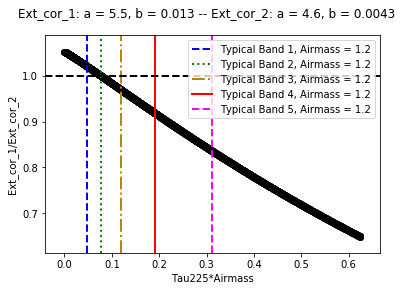

In [4]:
from compare_tau_relations import comparetau

a1 = 5.5
b1 = 0.013

a2 = 4.6
b2 = 0.0043

comparetau(a1,b1,a2,b2)

This shows you typical grade 1, 2, and 3 weather and the percentage difference this opacity relation would cause in the final FCFs

# Deriving the FCFs 

Now we use `identify_outliers_find_FCFs.py` identify major outliers in the FCF versus MJD plots in order to practically fine tune the weather/time constraints even more (looking at different times of night: early evening, sweet spot, extended observing, and different weather bands - THIS ASSUMES THE OPACITY RELATION IS CONSTANT AT THESE OTHER TIMES/TEMPERATURES) and to derive the final FCFs and their associated uncertainties.

In [5]:
import glob

for eachresultsfile in sorted(glob.glob('results/*bin')):
    print(eachresultsfile)

results/TauRelPipeline_FullResults_450_Arp220_20110501_201812201521.bin
results/TauRelPipeline_FullResults_450_Arp220_20120601_201812201549.bin
results/TauRelPipeline_FullResults_450_Arp220_20140101_201812201614.bin
results/TauRelPipeline_FullResults_450_Arp220_20150127_201812261115.bin
results/TauRelPipeline_FullResults_450_Arp220_20150410_201812201807.bin
results/TauRelPipeline_FullResults_450_Arp220_20161101_201812201915.bin
results/TauRelPipeline_FullResults_450_Arp220_20171206_201812201959.bin
results/TauRelPipeline_FullResults_450_Arp220_20180111_201812202006.bin
results/TauRelPipeline_FullResults_450_Arp220_20180501_201812202024.bin
results/TauRelPipeline_FullResults_450_Arp220_20180630_201812202037.bin
results/TauRelPipeline_FullResults_450_Arp220_20180724_201812202046.bin
results/TauRelPipeline_FullResults_450_Arp220_20181126_201908191344.bin
results/TauRelPipeline_FullResults_450_Arp220_20181126_201908191445.bin
results/TauRelPipeline_FullResults_450_Arp220_20181126_201908191

Now, you can use this list of results directories along with the printed output of the TauRelResults() function (namely, the optimal, or, "best" dictionary keys), above, to change the find_outliers() input manually, or just use the automated results depending on what you want to look at. Also, you can play with the constraints and look at all the output images to identify the most optimal constraints to use! Information will be printed about the Beam_FWHM for each source and the sources together (if multiple sources are being analysed). The first plots show all identify outliers in the FCF versus MJD plots and colour those points differently in histograms of source properties so it is easy to see if certain properties (high airmass, low air temperature) bias the results. The final plots show the FCFs as a function of MJD and as a function of transmission and a printout of the FCF for each source in each epoch.

The identify_outliers_find_FCFs_make_catalogue code also produces a topcat readable catalogue of all the measured, calculated, and metadata values so you can plot any parameter against any other parameter.

In [8]:
#Use this to define  BINFILES and BESTKEYS arrays (already done, below, so this is commented out)

#print('BINFILES_450 = ',list(BINFILES_450))
#print('BESTKEYS_450 = ',list(BESTKEYS_450))
#print('BINFILES_850 = ',list(BINFILES_850))
#print('BESTKEYS_850 = ',list(BESTKEYS_850))

In [4]:
# Note that is is possible to run the above command on a wider array of data by adding more binfiles and bestkeys
# while changing the contstraints. Just because we couldn't determine a best opacity relation based on strict constraints
# doesn't mean we can't look at the FCF results assuming an opacity relation for some subset of data

20110501: OPACITY RELATION (CRL2688): tau_850 = 5.5(tau225 - 0.013) x Airmass

20110501: OPACITY RELATION (CRL618): tau_850 = 5.5(tau225 - 0.013) x Airmass

20110501: OPACITY RELATION (URANUS): tau_850 = 5.5(tau225 - 0.013) x Airmass

20110501: OPACITY RELATION (MARS): tau_850 = 5.5(tau225 - 0.013) x Airmass

20110501: OPACITY RELATION (NEPTUNE): tau_850 = 5.5(tau225 - 0.013) x Airmass

20110501: OPACITY RELATION (Arp220): tau_850 = 5.5(tau225 - 0.013) x Airmass

20120601: OPACITY RELATION (CRL2688): tau_850 = 5.5(tau225 - 0.013) x Airmass

20120601: OPACITY RELATION (CRL618): tau_850 = 5.5(tau225 - 0.013) x Airmass

20120601: OPACITY RELATION (URANUS): tau_850 = 5.5(tau225 - 0.013) x Airmass

20120601: OPACITY RELATION (MARS): tau_850 = 5.5(tau225 - 0.013) x Airmass

20120601: OPACITY RELATION (NEPTUNE): tau_850 = 5.5(tau225 - 0.013) x Airmass

20120601: OPACITY RELATION (Arp220): tau_850 = 5.5(tau225 - 0.013) x Airmass

20140101: OPACITY RELATION (CRL2688): tau_850 = 5.5(tau225 - 0.0

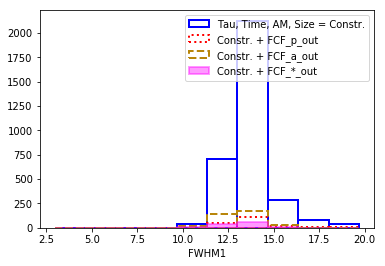

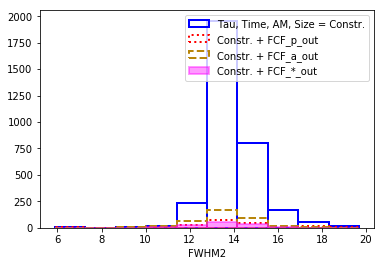

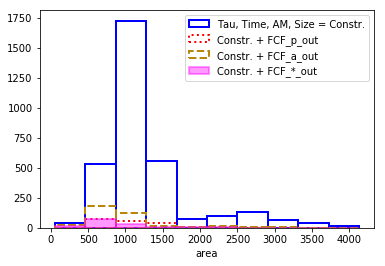

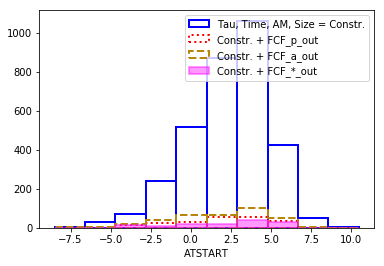

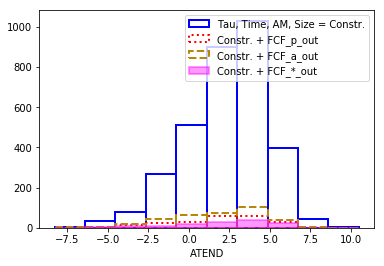

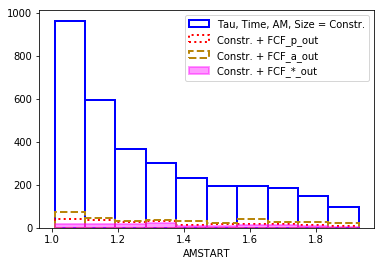

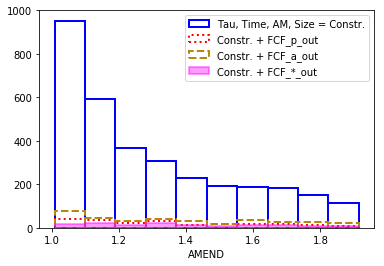

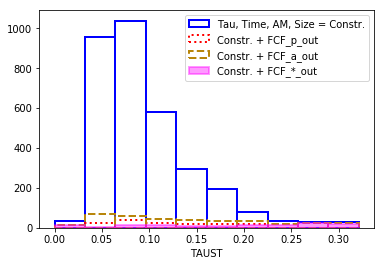

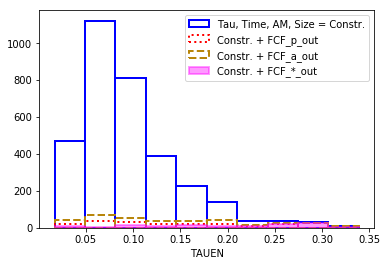

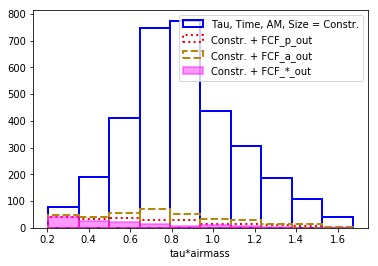

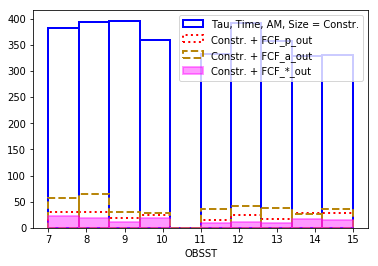

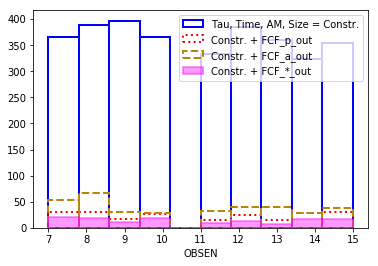

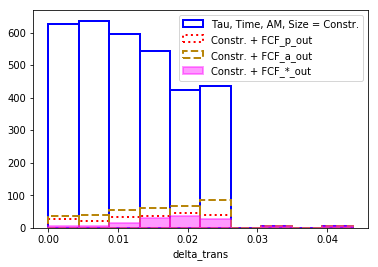

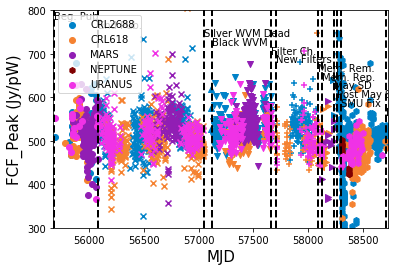



#############

CRL618:


Beg. Pub. -> End Pub., FCF Peak:  532.3690283083157 +/- 38.17652122580308  =  7.171063528454094
End Pub. -> Silver WVM Dead, FCF Peak:  496.4532310398705 +/- 35.93970231449638  =  7.239292659898116
Silver WVM Dead -> Black WVM, FCF Peak:  nan +/- -0.0  =  nan
Black WVM -> Filter Ch., FCF Peak:  508.8792727532538 +/- 30.450926257004568  =  5.983919543873751
Filter Ch. -> New Filters, FCF Peak:  nan +/- -0.0  =  nan
New Filters -> Mem. Rem., FCF Peak:  492.1194094328433 +/- 28.372473125302015  =  5.765363564505749
Mem. Rem. -> Mem. Rep., FCF Peak:  478.03820714424893 +/- 23.867251353937  =  4.992749742016962
Mem. Rep. -> May SD, FCF Peak:  490.3064940971633 +/- 37.96171652290661  =  7.742446200474717
May SD -> Post May SD, FCF Peak:  nan +/- -0.0  =  nan
Post May SD -> SMU Fix, FCF Peak:  nan +/- -0.0  =  nan
SMU Fix -> End, FCF Peak:  472.02449439833094 +/- 31.764727411439246  =  6.729465904503188


#############

URANUS:


Beg. Pub. -> End Pub., FCF Peak:  54

/local/python/lib/python3.5/site-packages/numpy/lib/function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/local/python/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


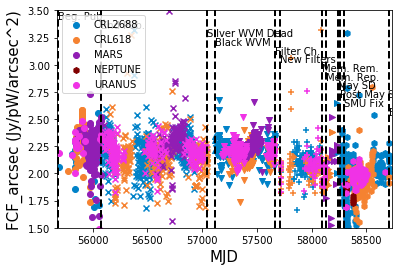



#############

CRL618:


Beg. Pub. -> End Pub., FCF Arcsec:  2.2778308663893903 +/- 0.142482194851147  =  6.2551700810427935
End Pub. -> Silver WVM Dead, FCF Arcsec:  2.1376291615730443 +/- 0.11322405947896845  =  5.296711960817789
No data points in this epoch
Black WVM -> Filter Ch., FCF Arcsec:  2.134964177246168 +/- 0.07441034061664852  =  3.48532033509941
No data points in this epoch
New Filters -> Mem. Rem., FCF Arcsec:  2.029569031392927 +/- 0.096132580331962  =  4.736600669649784
Mem. Rem. -> Mem. Rep., FCF Arcsec:  1.9438776993331568 +/- 0.07180357913301094  =  3.6938321355115606
Mem. Rep. -> May SD, FCF Arcsec:  2.0404109299924778 +/- 0.1424873529248463  =  6.983267479623411
No data points in this epoch
No data points in this epoch
SMU Fix -> End, FCF Arcsec:  1.9414046525222515 +/- 0.09156161270679739  =  4.716255963837398


#############

URANUS:


Beg. Pub. -> End Pub., FCF Arcsec:  2.2785209822001233 +/- 0.1092259706805431  =  4.793722398600662
End Pub. -> Silver WVM Dea

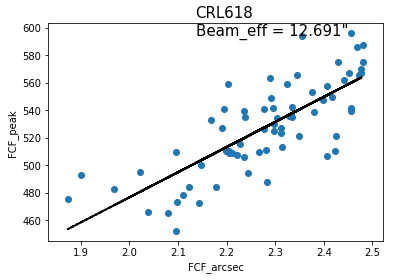

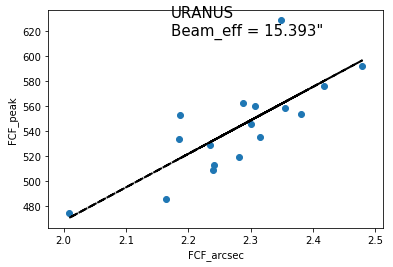

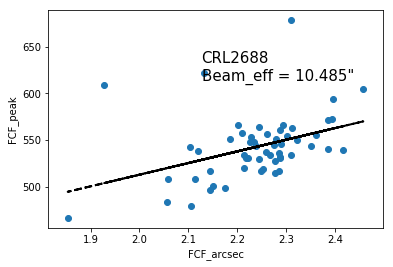

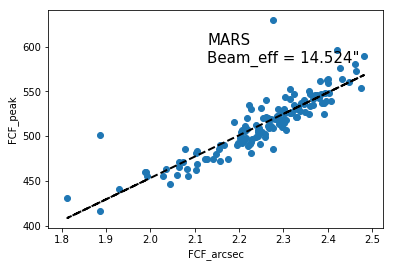

%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%


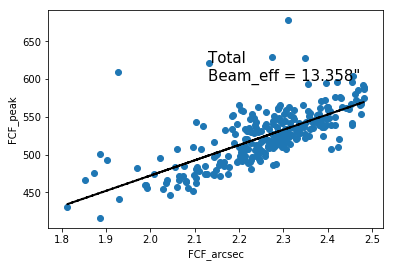



#############
Epoch: End Pub.


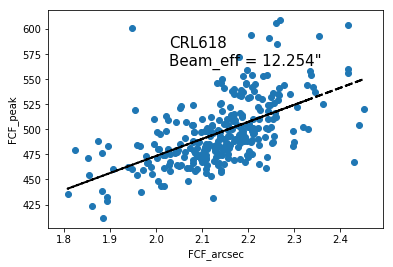

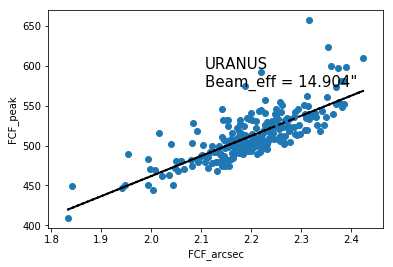

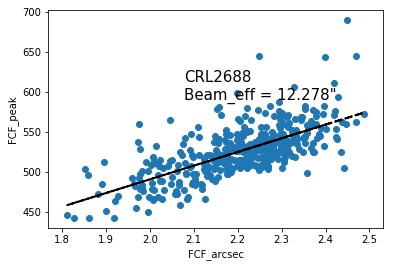

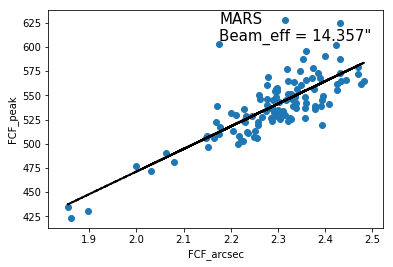

%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%


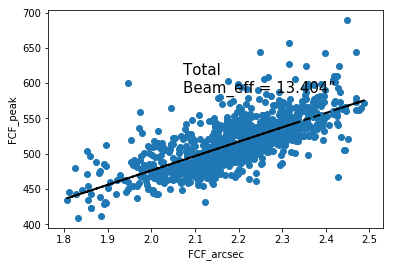



#############
Epoch: Silver WVM Dead
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%


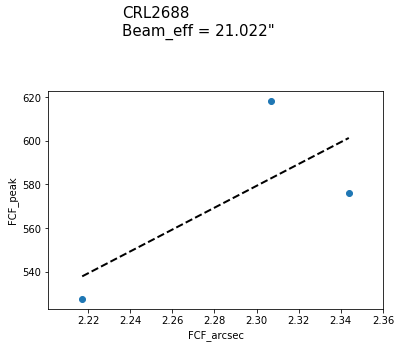

%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%


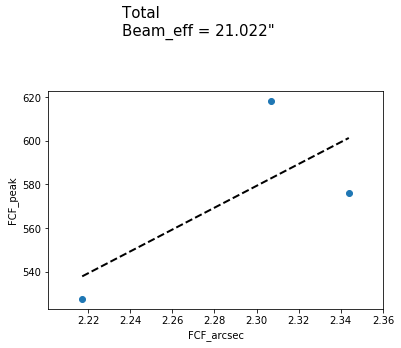



#############
Epoch: Black WVM


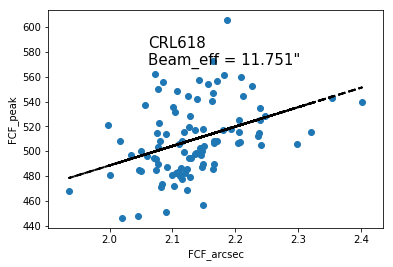

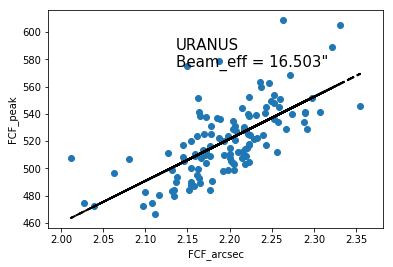

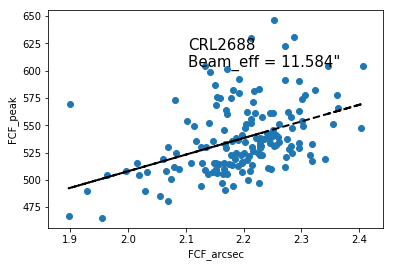

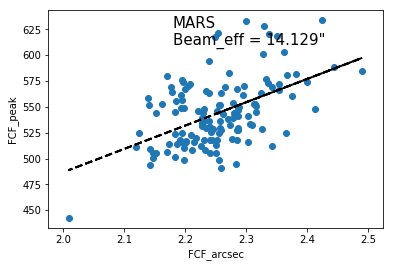

%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%


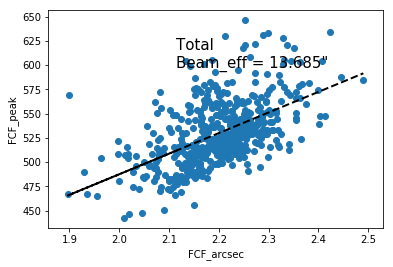



#############
Epoch: Filter Ch.
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Beam Size Calculated for this Epoch %%%%%%


#############
Epoch: New Filters


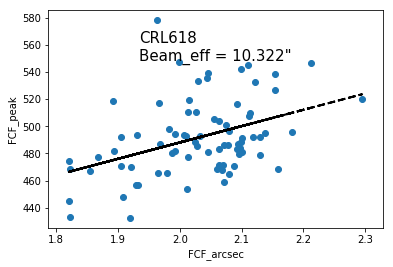

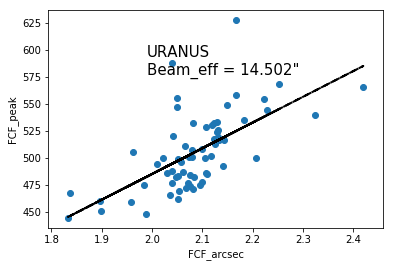

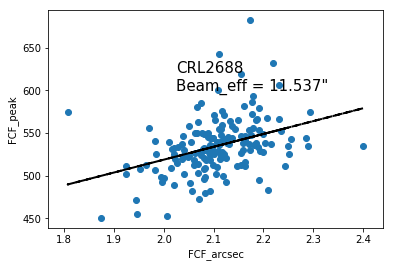

%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%


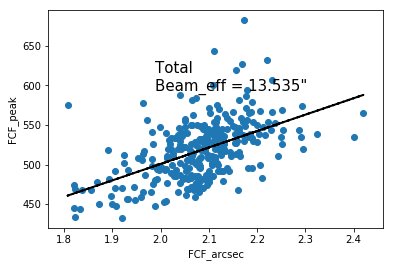



#############
Epoch: Mem. Rem.


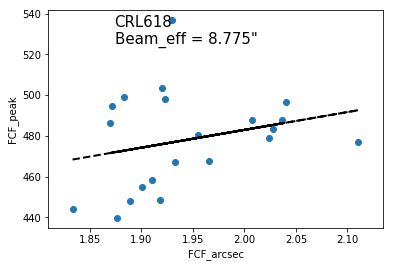

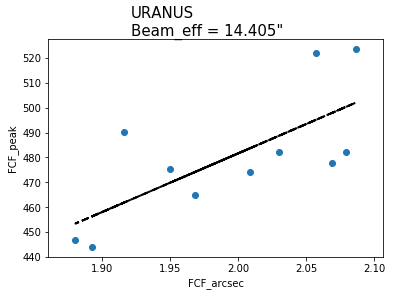

%%%%%% No Data for this source in this Epoch %%%%%%


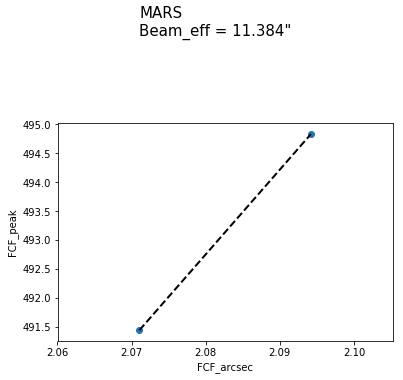

%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%


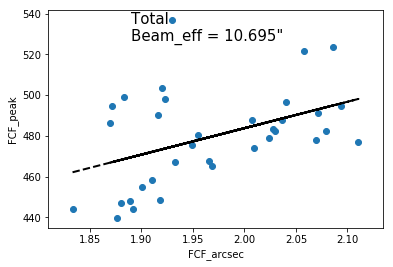



#############
Epoch: Mem. Rep.


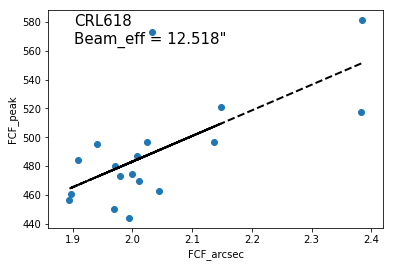

%%%%%% No Data for this source in this Epoch %%%%%%


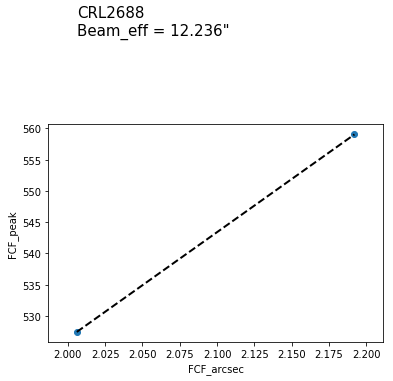

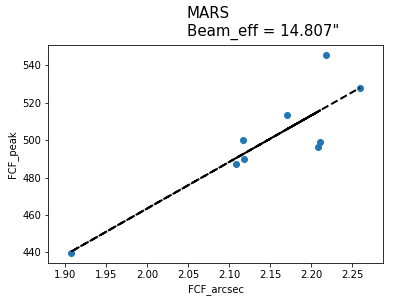

%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%


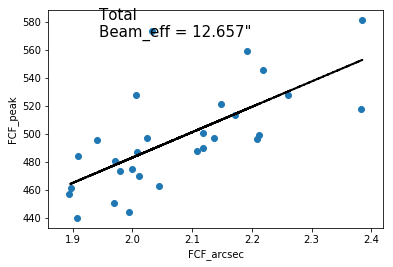



#############
Epoch: May SD
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Beam Size Calculated for this Epoch %%%%%%


#############
Epoch: Post May SD
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%


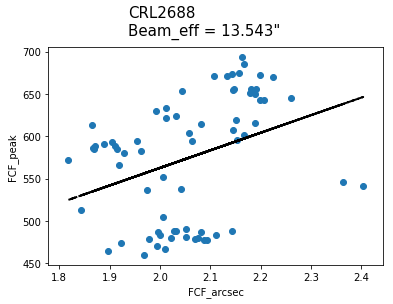

%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%


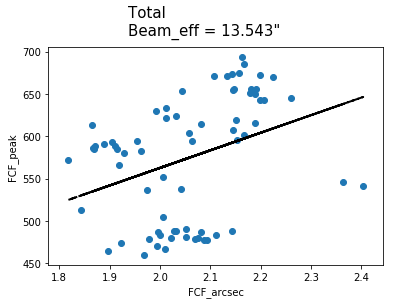



#############
Epoch: SMU Fix


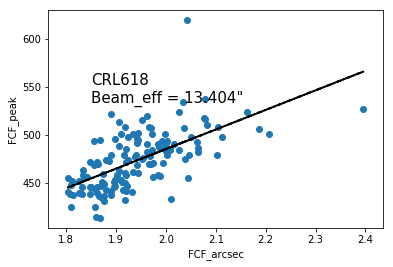

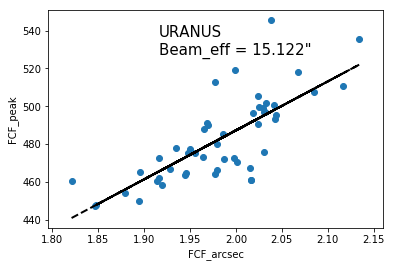

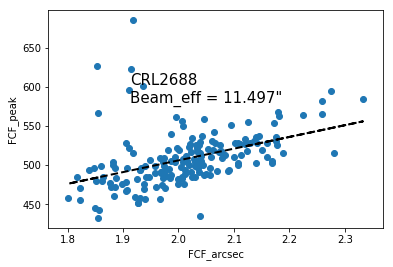

%%%%%% No Data for this source in this Epoch %%%%%%


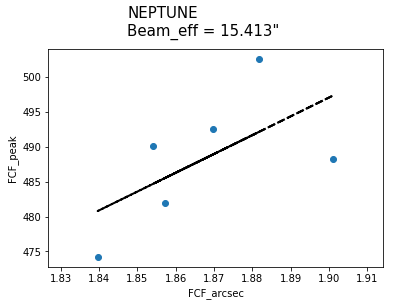

%%%%%% No Data for this source in this Epoch %%%%%%


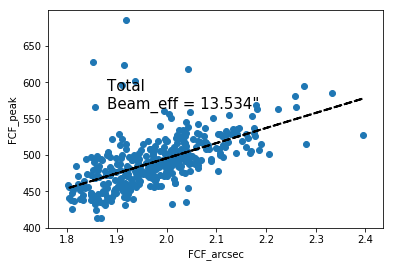

0

In [3]:
# 850 Microns!!! NEW OPACITY RELATION

#from identify_outliers_find_FCFs_make_catalogue import find_outliers

from identify_outliers_find_FCFs_full_beta import find_outliers
import os

# If you are manually running the find_outliers command:
include_sources_850 = ['CRL618','URANUS','CRL2688', 'MARS', 'NEPTUNE', 'Arp220']

BINFILES_850 = ['results/TauRelPipeline_FullResults_850_CRL2688_20110501_201804231457.bin',\
                'results/TauRelPipeline_FullResults_850_CRL618_20110501_201804231538.bin',\
                'results/TauRelPipeline_FullResults_850_URANUS_20110501_201804231610.bin',\
                'results/TauRelPipeline_FullResults_850_MARS_20110501_201804231715.bin',\
                'results/TauRelPipeline_FullResults_850_NEPTUNE_20110501_201807021104.bin',\
                'results/TauRelPipeline_FullResults_850_Arp220_20110501_201812201523.bin',\
                'results/TauRelPipeline_FullResults_850_CRL2688_20120601_201804240251.bin',\
                'results/TauRelPipeline_FullResults_850_CRL618_20120601_201804240450.bin',\
                'results/TauRelPipeline_FullResults_850_URANUS_20120601_201804240727.bin',\
                'results/TauRelPipeline_FullResults_850_MARS_20120601_201804240814.bin',\
                'results/TauRelPipeline_FullResults_850_NEPTUNE_20120601_201807021143.bin',\
                'results/TauRelPipeline_FullResults_850_Arp220_20120601_201812201704.bin',\
                'results/TauRelPipeline_FullResults_850_CRL2688_20140101_201804240945.bin',\
                'results/TauRelPipeline_FullResults_850_CRL618_20140101_201804241135.bin',\
                'results/TauRelPipeline_FullResults_850_URANUS_20140101_201804241405.bin',\
                'results/TauRelPipeline_FullResults_850_MARS_20140101_201804241505.bin',\
                'results/TauRelPipeline_FullResults_850_NEPTUNE_20140101_201807021155.bin',\
                'results/TauRelPipeline_FullResults_850_Arp220_20140101_201812201741.bin',\
                'results/TauRelPipeline_FullResults_850_CRL2688_20150127_201812261116.bin',\
                'results/TauRelPipeline_FullResults_850_CRL618_20150127_201812261117.bin',\
                'results/TauRelPipeline_FullResults_850_URANUS_20150127_201812261118.bin',\
                'results/TauRelPipeline_FullResults_850_MARS_20150127_201812261118.bin',\
                'results/TauRelPipeline_FullResults_850_Arp220_20150127_201812261119.bin',\
                'results/TauRelPipeline_FullResults_850_NEPTUNE_20150127_201812261119.bin',\
                'results/TauRelPipeline_FullResults_850_CRL2688_20150410_201804242101.bin',\
                'results/TauRelPipeline_FullResults_850_CRL618_20150410_201804242231.bin',\
                'results/TauRelPipeline_FullResults_850_URANUS_20150410_201804250043.bin',\
                'results/TauRelPipeline_FullResults_850_MARS_20150410_201804250217.bin',\
                'results/TauRelPipeline_FullResults_850_NEPTUNE_20150410_201807021230.bin',\
                'results/TauRelPipeline_FullResults_850_Arp220_20150410_201812201850.bin',\
                'results/TauRelPipeline_FullResults_850_CRL2688_20161101_201804250607.bin',\
                'results/TauRelPipeline_FullResults_850_CRL618_20161101_201804250717.bin',\
                'results/TauRelPipeline_FullResults_850_URANUS_20161101_201804250822.bin',\
                'results/TauRelPipeline_FullResults_850_MARS_20161101_201804250833.bin',\
                'results/TauRelPipeline_FullResults_850_NEPTUNE_20161101_201807021249.bin',\
                'results/TauRelPipeline_FullResults_850_Arp220_20161101_201812201957.bin',\
                'results/TauRelPipeline_FullResults_850_CRL2688_20171206_201804250852.bin',\
                'results/TauRelPipeline_FullResults_850_CRL618_20171206_201804250902.bin',\
                'results/TauRelPipeline_FullResults_850_URANUS_20171206_201804250915.bin',\
                'results/TauRelPipeline_FullResults_850_MARS_20171206_201804250919.bin',\
                'results/TauRelPipeline_FullResults_850_NEPTUNE_20171206_201807021252.bin',\
                'results/TauRelPipeline_FullResults_850_Arp220_20171206_201812201959.bin',\
                'results/TauRelPipeline_FullResults_850_CRL2688_20180111_201804301419.bin',\
                'results/TauRelPipeline_FullResults_850_CRL618_20180111_201804301436.bin',\
                'results/TauRelPipeline_FullResults_850_URANUS_20180111_201804301440.bin',\
                'results/TauRelPipeline_FullResults_850_MARS_20180111_201804301458.bin',\
                'results/TauRelPipeline_FullResults_850_NEPTUNE_20180111_201807021258.bin',\
                'results/TauRelPipeline_FullResults_850_Arp220_20180111_201812202018.bin',\
                'results/TauRelPipeline_FullResults_850_CRL2688_20180501_201807051706.bin',\
                'results/TauRelPipeline_FullResults_850_CRL618_20180501_201807051707.bin',\
                'results/TauRelPipeline_FullResults_850_URANUS_20180501_201807051710.bin',\
                'results/TauRelPipeline_FullResults_850_MARS_20180501_201807051719.bin',\
                'results/TauRelPipeline_FullResults_850_NEPTUNE_20180501_201807051721.bin',\
                'results/TauRelPipeline_FullResults_850_Arp220_20180501_201812202033.bin',\
                'results/TauRelPipeline_FullResults_850_CRL2688_20180630_201807251117.bin',\
                'results/TauRelPipeline_FullResults_850_CRL618_20180630_201807251120.bin',\
                'results/TauRelPipeline_FullResults_850_URANUS_20180630_201807251127.bin',\
                'results/TauRelPipeline_FullResults_850_MARS_20180630_201807251138.bin',\
                'results/TauRelPipeline_FullResults_850_NEPTUNE_20180630_201807251141.bin',\
                'results/TauRelPipeline_FullResults_850_Arp220_20180630_201812202042.bin',\
                'results/TauRelPipeline_FullResults_850_CRL2688_20180724_201811281102.bin',\
                'results/TauRelPipeline_FullResults_850_CRL618_20180724_201811281136.bin',\
                'results/TauRelPipeline_FullResults_850_URANUS_20180724_201811281159.bin',\
                'results/TauRelPipeline_FullResults_850_MARS_20180724_201811281201.bin',\
                'results/TauRelPipeline_FullResults_850_NEPTUNE_20180724_201811281204.bin',\
                'results/TauRelPipeline_FullResults_850_Arp220_20180724_201812202050.bin',\
                'results/TauRelPipeline_FullResults_850_CRL2688_20181126_201908192038.bin',\
                'results/TauRelPipeline_FullResults_850_CRL618_20181126_201908192204.bin',\
                'results/TauRelPipeline_FullResults_850_URANUS_20181126_201908192235.bin',\
                'results/TauRelPipeline_FullResults_850_MARS_20181126_201908192307.bin',\
                'results/TauRelPipeline_FullResults_850_NEPTUNE_20181126_201908150136.bin',\
                'results/TauRelPipeline_FullResults_850_Arp220_20181126_201908200030.bin']

BESTKEYS_850 = ['Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1',\
                'Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1',\
                'Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1',\
                'Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1',\
                'Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1',\
                'Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1','Run_1',\
                'Run_1']

FCF_850_dict = find_outliers(BINFILES=BINFILES_850,BESTKEYS=BESTKEYS_850,OBSSTLIM=7,OBSENLIM=16,LOWERTAULIM=0.0,\
                             UPPERTAULIM=0.32,wavelength='850',FWHMLIM=20.0,AMLIM=1.9,PIX_SIZE=1.0,\
                             INCLUDESOURCES=include_sources_850)

os.system('rm -rf tmpADAM*')

In [1]:
# 450 Microns!!!

#from identify_outliers_find_FCFs_make_catalogue import find_outliers

from identify_outliers_find_FCFs_full_beta import find_outliers

# If you are manually running the find_outliers command:
include_sources_450 = ['CRL618','URANUS','CRL2688', 'MARS', 'NEPTUNE','Arp220'] 

BINFILES_450 = ['results/TauRelPipeline_FullResults_450_CRL2688_20110501_201804231311.bin',\
                'results/TauRelPipeline_FullResults_450_CRL618_20110501_201804231331.bin',\
                'results/TauRelPipeline_FullResults_450_URANUS_20110501_201804231342.bin',\
                'results/TauRelPipeline_FullResults_450_MARS_20110501_201804231415.bin',\
                'results/TauRelPipeline_FullResults_450_NEPTUNE_20110501_201807021059.bin',\
                'results/TauRelPipeline_FullResults_450_Arp220_20110501_201812201521.bin',\
                'results/TauRelPipeline_FullResults_450_CRL2688_20120601_201804231834.bin',\
                'results/TauRelPipeline_FullResults_450_CRL618_20120601_201804231947.bin',\
                'results/TauRelPipeline_FullResults_450_URANUS_20120601_201804232052.bin',\
                'results/TauRelPipeline_FullResults_450_MARS_20120601_201804232115.bin',\
                'results/TauRelPipeline_FullResults_450_NEPTUNE_20120601_201807021117.bin',\
                'results/TauRelPipeline_FullResults_450_Arp220_20120601_201812201549.bin',\
                'results/TauRelPipeline_FullResults_450_CRL2688_20140101_201804232204.bin',\
                'results/TauRelPipeline_FullResults_450_CRL618_20140101_201804232300.bin',\
                'results/TauRelPipeline_FullResults_450_URANUS_20140101_201804232357.bin',\
                'results/TauRelPipeline_FullResults_450_MARS_20140101_201804240031.bin',\
                'results/TauRelPipeline_FullResults_450_NEPTUNE_20140101_201807021131.bin',\
                'results/TauRelPipeline_FullResults_450_Arp220_20140101_201812201614.bin',\
                'results/TauRelPipeline_FullResults_450_CRL2688_20150127_201812261106.bin',\
                'results/TauRelPipeline_FullResults_450_CRL618_20150127_201812261108.bin',\
                'results/TauRelPipeline_FullResults_450_URANUS_20150127_201812261110.bin',\
                'results/TauRelPipeline_FullResults_450_MARS_20150127_201812261111.bin',\
                'results/TauRelPipeline_FullResults_450_NEPTUNE_20150127_201812261113.bin',\
                'results/TauRelPipeline_FullResults_450_Arp220_20150127_201812261115.bin',\
                'results/TauRelPipeline_FullResults_450_CRL2688_20150410_201804241613.bin',\
                'results/TauRelPipeline_FullResults_450_CRL618_20150410_201804241702.bin',\
                'results/TauRelPipeline_FullResults_450_URANUS_20150410_201804241754.bin',\
                'results/TauRelPipeline_FullResults_450_MARS_20150410_201804241844.bin',\
                'results/TauRelPipeline_FullResults_450_NEPTUNE_20150410_201807021214.bin',\
                'results/TauRelPipeline_FullResults_450_Arp220_20150410_201812201807.bin',\
                'results/TauRelPipeline_FullResults_450_CRL2688_20161101_201804250313.bin',\
                'results/TauRelPipeline_FullResults_450_CRL618_20161101_201804250350.bin',\
                'results/TauRelPipeline_FullResults_450_URANUS_20161101_201804250415.bin',\
                'results/TauRelPipeline_FullResults_450_MARS_20161101_201804250421.bin',\
                'results/TauRelPipeline_FullResults_450_NEPTUNE_20161101_201807021240.bin',\
                'results/TauRelPipeline_FullResults_450_Arp220_20161101_201812201915.bin',\
                'results/TauRelPipeline_FullResults_450_CRL2688_20171206_201804250836.bin',\
                'results/TauRelPipeline_FullResults_450_CRL618_20171206_201804250841.bin',\
                'results/TauRelPipeline_FullResults_450_URANUS_20171206_201804250847.bin',\
                'results/TauRelPipeline_FullResults_450_MARS_20171206_201804250850.bin',\
                'results/TauRelPipeline_FullResults_450_NEPTUNE_20171206_201807021252.bin',\
                'results/TauRelPipeline_FullResults_450_Arp220_20171206_201812201959.bin',\
                'results/TauRelPipeline_FullResults_450_CRL2688_20180111_201804301344.bin',\
                'results/TauRelPipeline_FullResults_450_CRL618_20180111_201804301357.bin',\
                'results/TauRelPipeline_FullResults_450_URANUS_20180111_201804301402.bin',\
                'results/TauRelPipeline_FullResults_450_MARS_20180111_201804301414.bin',\
                'results/TauRelPipeline_FullResults_450_NEPTUNE_20180111_201807021256.bin',\
                'results/TauRelPipeline_FullResults_450_Arp220_20180111_201812202006.bin',\
                'results/TauRelPipeline_FullResults_450_CRL2688_20180501_201807051631.bin',\
                'results/TauRelPipeline_FullResults_450_CRL618_20180501_201807051633.bin',\
                'results/TauRelPipeline_FullResults_450_URANUS_20180501_201807051635.bin',\
                'results/TauRelPipeline_FullResults_450_MARS_20180501_201807051641.bin',\
                'results/TauRelPipeline_FullResults_450_NEPTUNE_20180501_201807051643.bin',\
                'results/TauRelPipeline_FullResults_450_Arp220_20180501_201812202024.bin',\
                'results/TauRelPipeline_FullResults_450_CRL2688_20180630_201807250954.bin',\
                'results/TauRelPipeline_FullResults_450_CRL618_20180630_201807250957.bin',\
                'results/TauRelPipeline_FullResults_450_URANUS_20180630_201807251000.bin',\
                'results/TauRelPipeline_FullResults_450_MARS_20180630_201807251007.bin',\
                'results/TauRelPipeline_FullResults_450_NEPTUNE_20180630_201807251045.bin',\
                'results/TauRelPipeline_FullResults_450_Arp220_20180630_201812202037.bin',\
                'results/TauRelPipeline_FullResults_450_CRL2688_20180724_201811280935.bin',\
                'results/TauRelPipeline_FullResults_450_CRL618_20180724_201811280954.bin',\
                'results/TauRelPipeline_FullResults_450_URANUS_20180724_201811281003.bin',\
                'results/TauRelPipeline_FullResults_450_MARS_20180724_201811281006.bin',\
                'results/TauRelPipeline_FullResults_450_NEPTUNE_20180724_201811281009.bin',\
                'results/TauRelPipeline_FullResults_450_Arp220_20180724_201812202046.bin',\
                'results/TauRelPipeline_FullResults_450_CRL2688_20181126_201908191638.bin',\
                'results/TauRelPipeline_FullResults_450_CRL618_20181126_201908191718.bin',\
                'results/TauRelPipeline_FullResults_450_URANUS_20181126_201908191733.bin',\
                'results/TauRelPipeline_FullResults_450_MARS_20181126_201908191747.bin',\
                'results/TauRelPipeline_FullResults_450_Arp220_20181126_201908191829.bin']

BESTKEYS_450 = ['Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0',\
                'Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0',\
                'Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0',\
                'Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0',\
                'Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0',\
                'Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0',\
                'Run_0']

FCF_450_dict = find_outliers(BINFILES=BINFILES_450,BESTKEYS=BESTKEYS_450,OBSSTLIM=7,OBSENLIM=16,LOWERTAULIM=0.0,\
                             UPPERTAULIM=0.32,wavelength='450',FWHMLIM=20.0,AMLIM=1.9,PIX_SIZE=1.0,\
                             INCLUDESOURCES=include_sources_450)


20110501: OPACITY RELATION (CRL2688): tau_450 = 26.0(tau225 - 0.012) x Airmass

20110501: OPACITY RELATION (CRL618): tau_450 = 26.0(tau225 - 0.012) x Airmass

20110501: OPACITY RELATION (URANUS): tau_450 = 26.0(tau225 - 0.012) x Airmass

20110501: OPACITY RELATION (MARS): tau_450 = 26.0(tau225 - 0.012) x Airmass

20110501: OPACITY RELATION (NEPTUNE): tau_450 = 26.0(tau225 - 0.012) x Airmass

20110501: OPACITY RELATION (Arp220): tau_450 = 26.0(tau225 - 0.012) x Airmass

20120601: OPACITY RELATION (CRL2688): tau_450 = 26.0(tau225 - 0.012) x Airmass

20120601: OPACITY RELATION (CRL618): tau_450 = 26.0(tau225 - 0.012) x Airmass

20120601: OPACITY RELATION (URANUS): tau_450 = 26.0(tau225 - 0.012) x Airmass

20120601: OPACITY RELATION (MARS): tau_450 = 26.0(tau225 - 0.012) x Airmass

20120601: OPACITY RELATION (NEPTUNE): tau_450 = 26.0(tau225 - 0.012) x Airmass

20120601: OPACITY RELATION (Arp220): tau_450 = 26.0(tau225 - 0.012) x Airmass

20140101: OPACITY RELATION (CRL2688): tau_450 = 26.0



#############

CRL618:


Beg. Pub. -> End Pub., FCF Peak:  538.8248531753569 +/- 90.83030911960657  =  16.857112025240315
End Pub. -> Silver WVM Dead, FCF Peak:  445.576102231023 +/- 87.39367882517382  =  19.613636904580176
Silver WVM Dead -> Black WVM, FCF Peak:  nan +/- -0.0  =  nan
Black WVM -> Filter Ch., FCF Peak:  481.2747672762584 +/- 84.80073008037822  =  17.620024120587527
Filter Ch. -> New Filters, FCF Peak:  nan +/- -0.0  =  nan
New Filters -> Mem. Rem., FCF Peak:  521.7810742865489 +/- 89.77389652582346  =  17.20528032730484
Mem. Rem. -> Mem. Rep., FCF Peak:  597.2152468447571 +/- 101.67758915903059  =  17.025283546630742
Mem. Rep. -> May SD, FCF Peak:  442.85420497973735 +/- 106.91715082441708  =  24.142742605167097
May SD -> Post May SD, FCF Peak:  nan +/- -0.0  =  nan
Post May SD -> SMU Fix, FCF Peak:  nan +/- -0.0  =  nan
SMU Fix -> End, FCF Peak:  400.3419115913575 +/- 90.65996453614041  =  22.645634122035194


#############

URANUS:


Beg. Pub. -> End Pub., FCF Peak

/local/python/lib/python3.5/site-packages/numpy/lib/function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/local/python/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)




#############

CRL618:


Beg. Pub. -> End Pub., FCF Arcsec:  4.496252145551276 +/- 0.7728585161013228  =  17.188949620319043
End Pub. -> Silver WVM Dead, FCF Arcsec:  3.927403465067144 +/- 0.7356960923818527  =  18.732378756743678
No data points in this epoch
Black WVM -> Filter Ch., FCF Arcsec:  3.9668472559805252 +/- 0.789067264095189  =  19.891546439192233
No data points in this epoch
New Filters -> Mem. Rem., FCF Arcsec:  4.19895249395692 +/- 0.7781688651782865  =  18.53245223179394
Mem. Rem. -> Mem. Rep., FCF Arcsec:  4.307328299915991 +/- 0.4297430875112896  =  9.977021893587057
Mem. Rep. -> May SD, FCF Arcsec:  3.4711725238120086 +/- 0.6839357404300273  =  19.703305892699785
No data points in this epoch
No data points in this epoch
SMU Fix -> End, FCF Arcsec:  3.0682459368397725 +/- 0.7685778281674688  =  25.049420548050573


#############

URANUS:


Beg. Pub. -> End Pub., FCF Arcsec:  4.862776753222716 +/- 0.7492486680482703  =  15.407836017800312
End Pub. -> Silver WVM Dead,

%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%




#############
Epoch: End Pub.


%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%




#############
Epoch: Silver WVM Dead
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%


/export/data/smairs/smairs_github/FCFAnalysis/scripts/identify_outliers_find_FCFs_full_beta.py:1602: RuntimeWarning: invalid value encountered in sqrt
  plt.text(np.nanmean(np.array(source_information_dict_by_epoch[eachsource]['FCF_arcsecs_'+str(eachepoch)])[FCF_goodind_for_beamsize])-np.nanstd(np.array(source_information_dict_by_epoch[eachsource]['FCF_arcsecs_'+str(eachepoch)])[FCF_goodind_for_beamsize]),np.nanmean(np.array(source_information_dict_by_epoch[eachsource]['FCF_peaks_'+str(eachepoch)])[FCF_goodind_for_beamsize])+2*np.nanstd(np.array(source_information_dict_by_epoch[eachsource]['FCF_peaks_'+str(eachepoch)])[FCF_goodind_for_beamsize]),eachsource+'\nBeam_eff = '+str(round(np.sqrt(m/1.133),3))+'"',fontsize=15)


%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%


/export/data/smairs/smairs_github/FCFAnalysis/scripts/identify_outliers_find_FCFs_full_beta.py:1619: RuntimeWarning: invalid value encountered in sqrt
  plt.text(np.nanmean(np.array(all_FCF_arcsecs_beamsize_thisepoch))-np.nanstd(np.array(all_FCF_arcsecs_beamsize_thisepoch)),np.nanmean(np.array(all_FCF_peaks_beamsize_thisepoch))+2*np.nanstd(np.array(all_FCF_peaks_beamsize_thisepoch)),'Total\nBeam_eff = '+str(round(np.sqrt(m/1.133),3))+'"',fontsize=15)




#############
Epoch: Black WVM


%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%




#############
Epoch: Filter Ch.
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Beam Size Calculated for this Epoch %%%%%%


#############
Epoch: New Filters


%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%




#############
Epoch: Mem. Rem.


%%%%%% No Data for this source in this Epoch %%%%%%


%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%




#############
Epoch: Mem. Rep.


%%%%%% No Data for this source in this Epoch %%%%%%


%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%




#############
Epoch: May SD
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Beam Size Calculated for this Epoch %%%%%%


#############
Epoch: Post May SD
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%


%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%




#############
Epoch: SMU Fix


%%%%%% No Data for this source in this Epoch %%%%%%


20110501: OPACITY RELATION (CRL2688): tau_850 = 4.6(tau225 - 0.0043) x Airmass

20110501: OPACITY RELATION (CRL618): tau_850 = 4.6(tau225 - 0.0043) x Airmass

20110501: OPACITY RELATION (URANUS): tau_850 = 4.6(tau225 - 0.0043) x Airmass

20110501: OPACITY RELATION (MARS): tau_850 = 4.6(tau225 - 0.0043) x Airmass

20110501: OPACITY RELATION (NEPTUNE): tau_850 = 4.6(tau225 - 0.0043) x Airmass

20110501: OPACITY RELATION (Arp220): tau_850 = 4.6(tau225 - 0.0043) x Airmass

20120601: OPACITY RELATION (CRL2688): tau_850 = 4.6(tau225 - 0.0043) x Airmass

20120601: OPACITY RELATION (CRL618): tau_850 = 4.6(tau225 - 0.0043) x Airmass

20120601: OPACITY RELATION (URANUS): tau_850 = 4.6(tau225 - 0.0043) x Airmass

20120601: OPACITY RELATION (MARS): tau_850 = 4.6(tau225 - 0.0043) x Airmass

20120601: OPACITY RELATION (NEPTUNE): tau_850 = 4.6(tau225 - 0.0043) x Airmass

20120601: OPACITY RELATION (Arp220): tau_850 = 4.6(tau225 - 0.0043) x Airmass

20140101: OPACITY RELATION (CRL2688): tau_850 = 4.6(

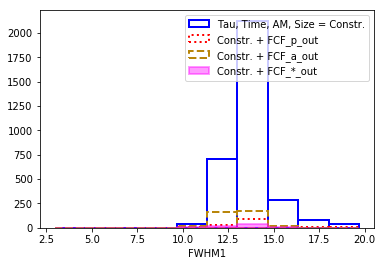

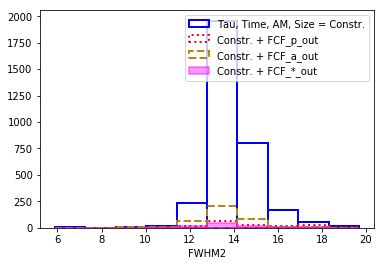

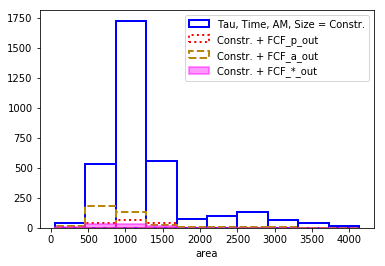

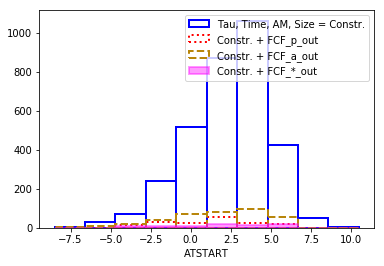

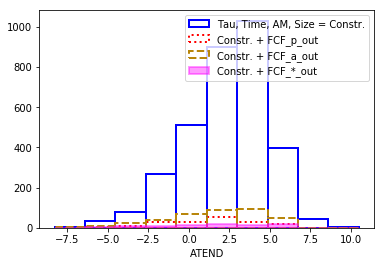

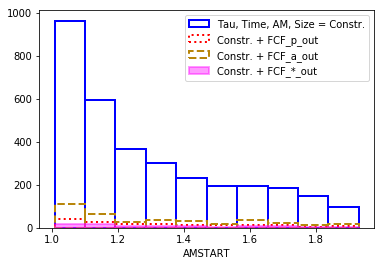

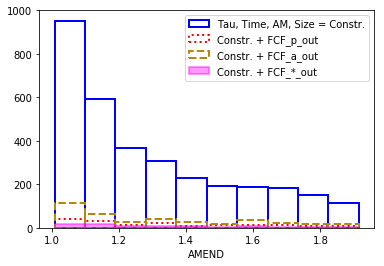

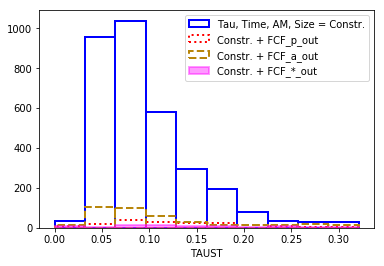

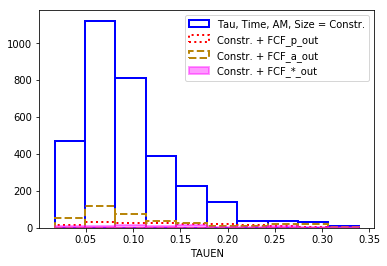

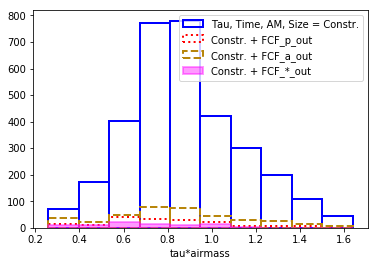

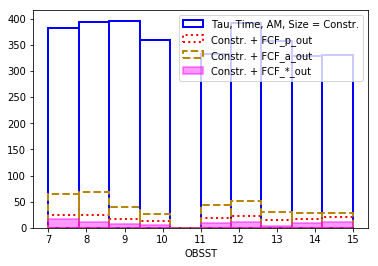

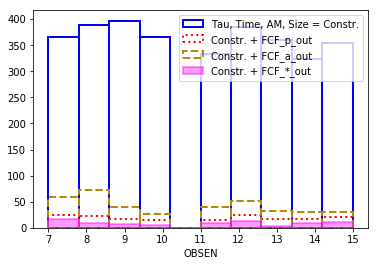

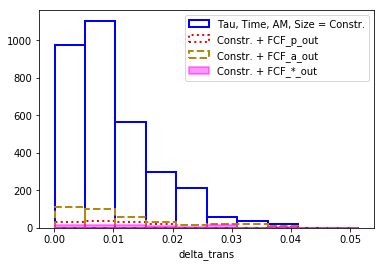

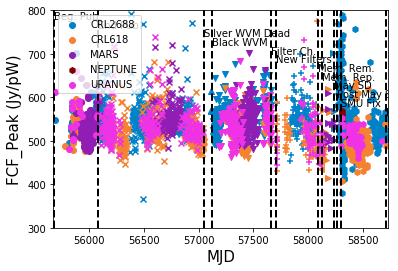



#############

CRL618:


Beg. Pub. -> End Pub., FCF Peak:  542.3248066523437 +/- 28.860635854610187  =  5.3216514348220185
End Pub. -> Silver WVM Dead, FCF Peak:  520.8054882755592 +/- 37.2361410477548  =  7.149721323223284
Silver WVM Dead -> Black WVM, FCF Peak:  nan +/- -0.0  =  nan
Black WVM -> Filter Ch., FCF Peak:  524.7068912912381 +/- 34.69030550356642  =  6.611368380963687
Filter Ch. -> New Filters, FCF Peak:  nan +/- -0.0  =  nan
New Filters -> Mem. Rem., FCF Peak:  508.21206134366383 +/- 32.751017014468  =  6.444360436444081
Mem. Rem. -> Mem. Rep., FCF Peak:  483.25405613272267 +/- 23.66282951316246  =  4.896560973026498
Mem. Rep. -> May SD, FCF Peak:  500.93840312855707 +/- 46.628559984653805  =  9.308242229671379
May SD -> Post May SD, FCF Peak:  nan +/- -0.0  =  nan
Post May SD -> SMU Fix, FCF Peak:  nan +/- -0.0  =  nan
SMU Fix -> End, FCF Peak:  488.8443777245622 +/- 32.53764696036795  =  6.656033789694352


#############

URANUS:


Beg. Pub. -> End Pub., FCF Peak:  55

/local/python/lib/python3.5/site-packages/numpy/lib/function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/local/python/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


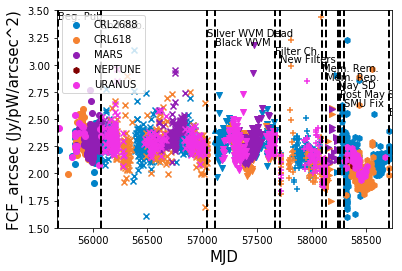



#############

CRL618:


Beg. Pub. -> End Pub., FCF Arcsec:  2.3220899142515554 +/- 0.10651021091596244  =  4.586825439543425
End Pub. -> Silver WVM Dead, FCF Arcsec:  2.230629741487062 +/- 0.09770633711921013  =  4.380213143489858
No data points in this epoch
Black WVM -> Filter Ch., FCF Arcsec:  2.1975547850238577 +/- 0.11426670138237045  =  5.199720260040293
No data points in this epoch
New Filters -> Mem. Rem., FCF Arcsec:  2.094560036416026 +/- 0.11387828473764529  =  5.436859424306639
Mem. Rem. -> Mem. Rep., FCF Arcsec:  1.9651951918616701 +/- 0.07311720425528799  =  3.7206077318977435
Mem. Rep. -> May SD, FCF Arcsec:  2.0495860164109487 +/- 0.12340806073904519  =  6.021121326498232
No data points in this epoch
No data points in this epoch
SMU Fix -> End, FCF Arcsec:  1.9893282925778566 +/- 0.0806807632230531  =  4.055678669230785


#############

URANUS:


Beg. Pub. -> End Pub., FCF Arcsec:  2.321144017033807 +/- 0.11068973050472805  =  4.768757547675934
End Pub. -> Silver WVM

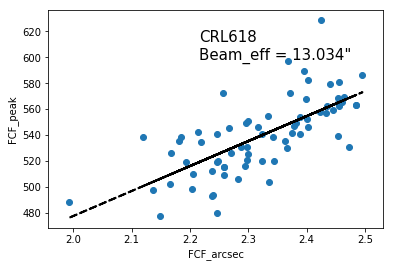

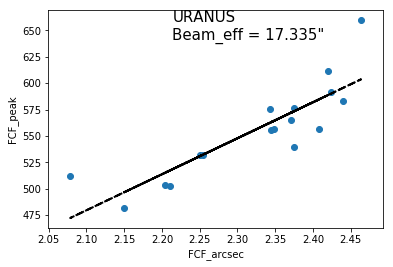

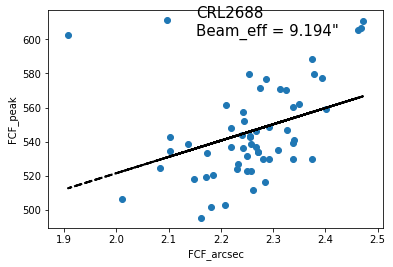

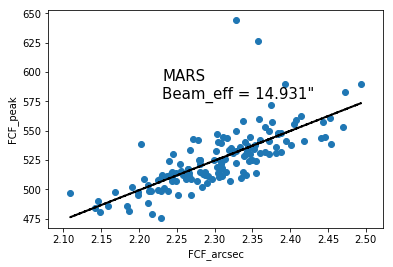

%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%


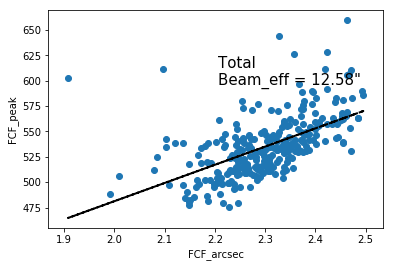



#############
Epoch: End Pub.


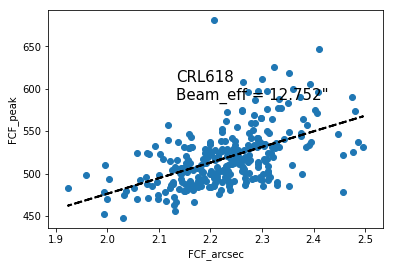

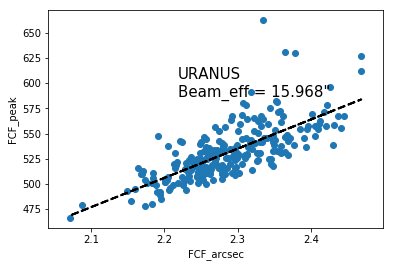

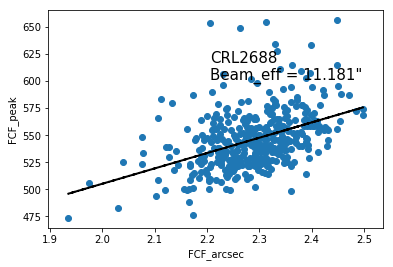

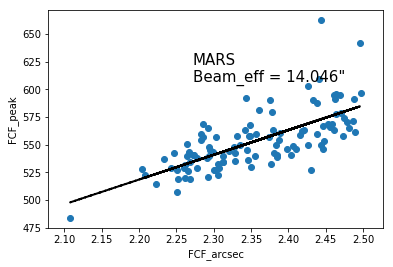

%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%


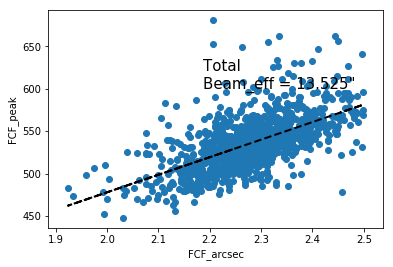



#############
Epoch: Silver WVM Dead
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%


/export/data/smairs/smairs_github/FCFAnalysis/scripts/identify_outliers_find_FCFs_full_beta.py:1602: RuntimeWarning: invalid value encountered in sqrt
  plt.text(np.nanmean(np.array(source_information_dict_by_epoch[eachsource]['FCF_arcsecs_'+str(eachepoch)])[FCF_goodind_for_beamsize])-np.nanstd(np.array(source_information_dict_by_epoch[eachsource]['FCF_arcsecs_'+str(eachepoch)])[FCF_goodind_for_beamsize]),np.nanmean(np.array(source_information_dict_by_epoch[eachsource]['FCF_peaks_'+str(eachepoch)])[FCF_goodind_for_beamsize])+2*np.nanstd(np.array(source_information_dict_by_epoch[eachsource]['FCF_peaks_'+str(eachepoch)])[FCF_goodind_for_beamsize]),eachsource+'\nBeam_eff = '+str(round(np.sqrt(m/1.133),3))+'"',fontsize=15)


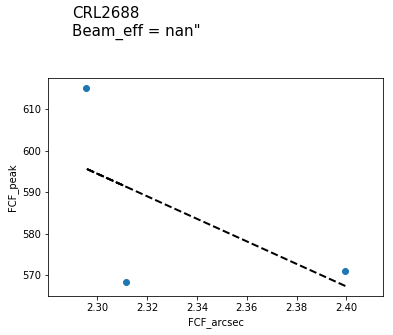

%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%


/export/data/smairs/smairs_github/FCFAnalysis/scripts/identify_outliers_find_FCFs_full_beta.py:1619: RuntimeWarning: invalid value encountered in sqrt
  plt.text(np.nanmean(np.array(all_FCF_arcsecs_beamsize_thisepoch))-np.nanstd(np.array(all_FCF_arcsecs_beamsize_thisepoch)),np.nanmean(np.array(all_FCF_peaks_beamsize_thisepoch))+2*np.nanstd(np.array(all_FCF_peaks_beamsize_thisepoch)),'Total\nBeam_eff = '+str(round(np.sqrt(m/1.133),3))+'"',fontsize=15)


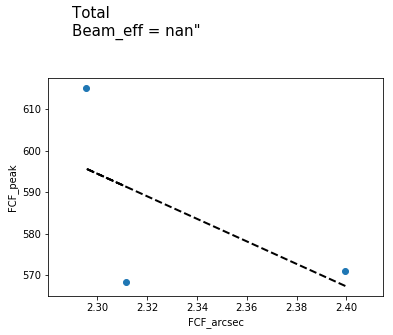



#############
Epoch: Black WVM


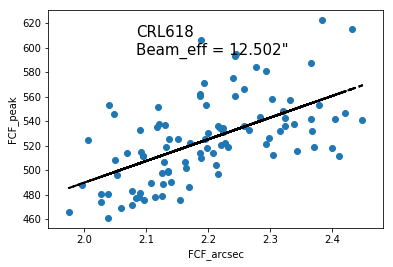

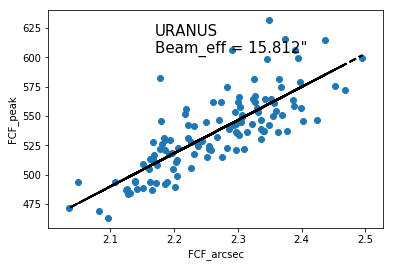

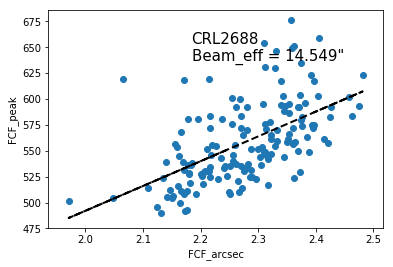

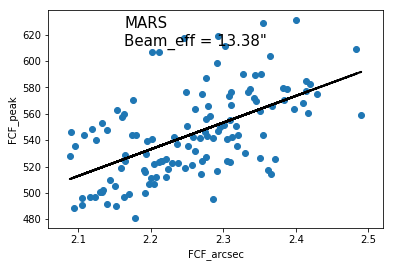

%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%


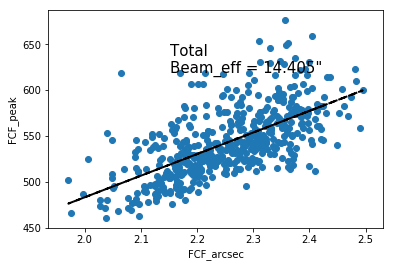



#############
Epoch: Filter Ch.
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Beam Size Calculated for this Epoch %%%%%%


#############
Epoch: New Filters


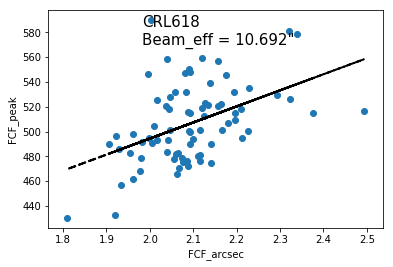

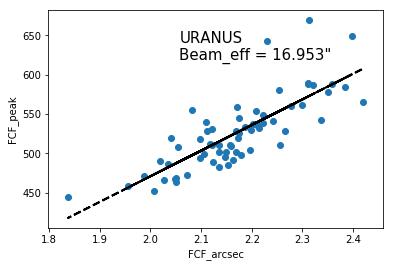

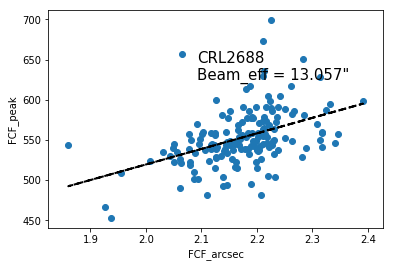

%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%


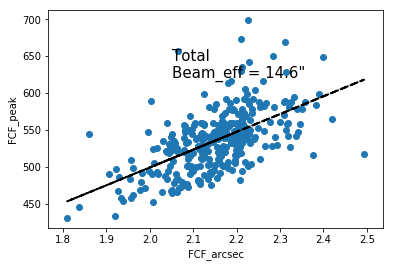



#############
Epoch: Mem. Rem.


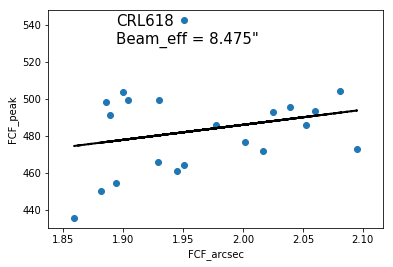

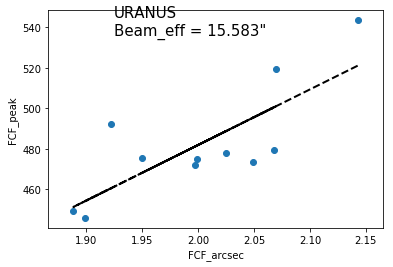

%%%%%% No Data for this source in this Epoch %%%%%%


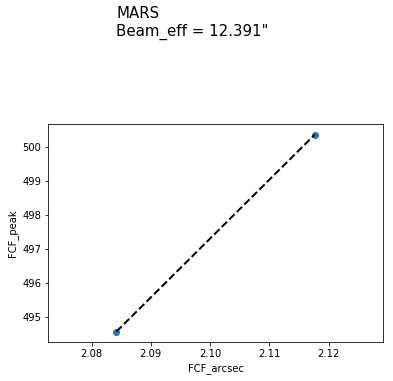

%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%


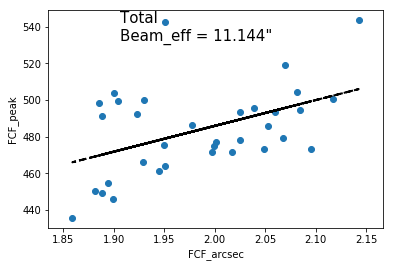



#############
Epoch: Mem. Rep.


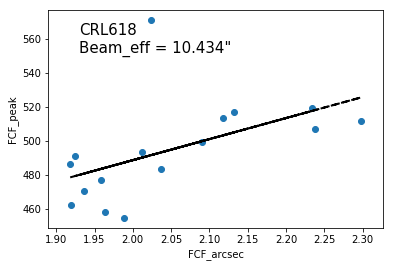

%%%%%% No Data for this source in this Epoch %%%%%%


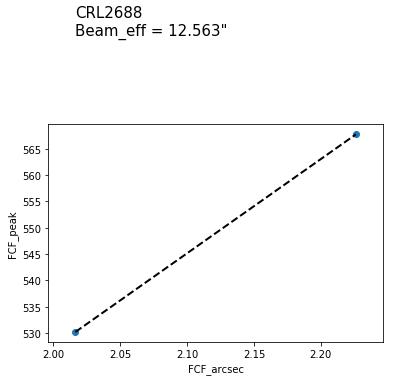

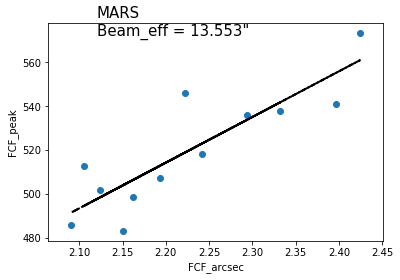

%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%


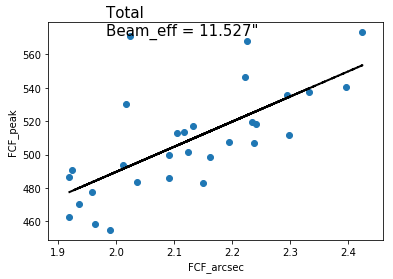



#############
Epoch: May SD
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Beam Size Calculated for this Epoch %%%%%%


#############
Epoch: Post May SD
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%


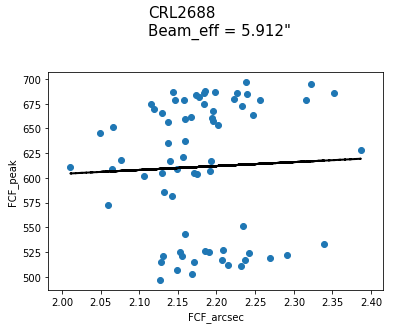

%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%
%%%%%% No Data for this source in this Epoch %%%%%%


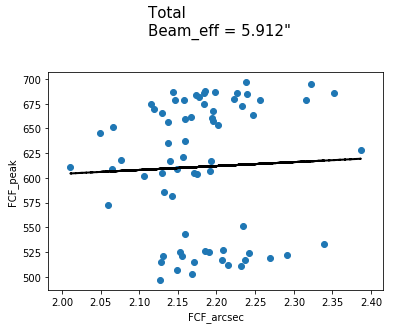



#############
Epoch: SMU Fix


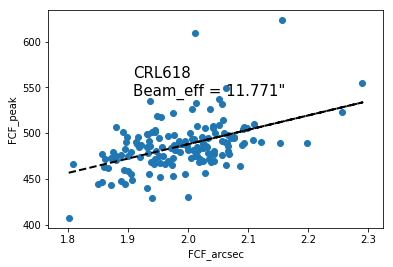

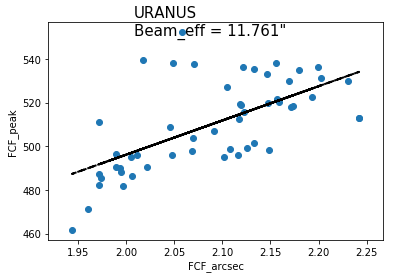

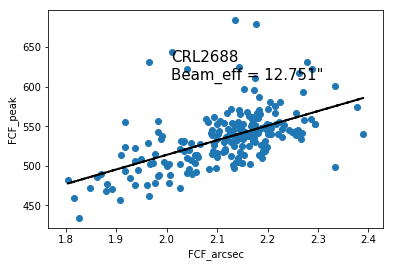

%%%%%% No Data for this source in this Epoch %%%%%%


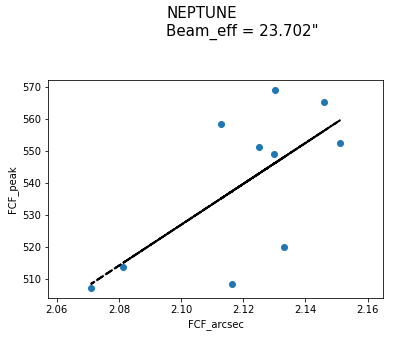

%%%%%% No Data for this source in this Epoch %%%%%%


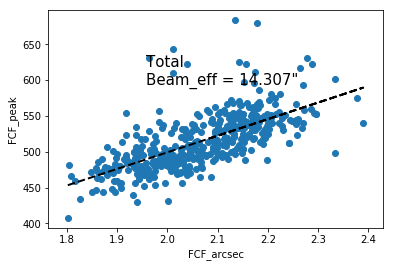

In [2]:
# 850 Microns, Nominal Opacity Relation!!!

#from identify_outliers_find_FCFs_make_catalogue import find_outliers

from identify_outliers_find_FCFs_full_beta import find_outliers

# If you are manually running the find_outliers command:

include_sources_850 = ['CRL618','URANUS','CRL2688', 'MARS', 'NEPTUNE','Arp220']

BINFILES_850 = ['results/TauRelPipeline_FullResults_850_CRL2688_20110501_201804231457.bin',\
                'results/TauRelPipeline_FullResults_850_CRL618_20110501_201804231538.bin',\
                'results/TauRelPipeline_FullResults_850_URANUS_20110501_201804231610.bin',\
                'results/TauRelPipeline_FullResults_850_MARS_20110501_201804231715.bin',\
                'results/TauRelPipeline_FullResults_850_NEPTUNE_20110501_201807021104.bin',\
                'results/TauRelPipeline_FullResults_850_Arp220_20110501_201812201523.bin',\
                'results/TauRelPipeline_FullResults_850_CRL2688_20120601_201804240251.bin',\
                'results/TauRelPipeline_FullResults_850_CRL618_20120601_201804240450.bin',\
                'results/TauRelPipeline_FullResults_850_URANUS_20120601_201804240727.bin',\
                'results/TauRelPipeline_FullResults_850_MARS_20120601_201804240814.bin',\
                'results/TauRelPipeline_FullResults_850_NEPTUNE_20120601_201807021143.bin',\
                'results/TauRelPipeline_FullResults_850_Arp220_20120601_201812201704.bin',\
                'results/TauRelPipeline_FullResults_850_CRL2688_20140101_201804240945.bin',\
                'results/TauRelPipeline_FullResults_850_CRL618_20140101_201804241135.bin',\
                'results/TauRelPipeline_FullResults_850_URANUS_20140101_201804241405.bin',\
                'results/TauRelPipeline_FullResults_850_MARS_20140101_201804241505.bin',\
                'results/TauRelPipeline_FullResults_850_NEPTUNE_20140101_201807021155.bin',\
                'results/TauRelPipeline_FullResults_850_Arp220_20140101_201812201741.bin',\
                'results/TauRelPipeline_FullResults_850_CRL2688_20150127_201812261116.bin',\
                'results/TauRelPipeline_FullResults_850_CRL618_20150127_201812261117.bin',\
                'results/TauRelPipeline_FullResults_850_URANUS_20150127_201812261118.bin',\
                'results/TauRelPipeline_FullResults_850_MARS_20150127_201812261118.bin',\
                'results/TauRelPipeline_FullResults_850_Arp220_20150127_201812261119.bin',\
                'results/TauRelPipeline_FullResults_850_NEPTUNE_20150127_201812261119.bin',\
                'results/TauRelPipeline_FullResults_850_CRL2688_20150410_201804242101.bin',\
                'results/TauRelPipeline_FullResults_850_CRL618_20150410_201804242231.bin',\
                'results/TauRelPipeline_FullResults_850_URANUS_20150410_201804250043.bin',\
                'results/TauRelPipeline_FullResults_850_MARS_20150410_201804250217.bin',\
                'results/TauRelPipeline_FullResults_850_NEPTUNE_20150410_201807021230.bin',\
                'results/TauRelPipeline_FullResults_850_Arp220_20150410_201812201850.bin',\
                'results/TauRelPipeline_FullResults_850_CRL2688_20161101_201804250607.bin',\
                'results/TauRelPipeline_FullResults_850_CRL618_20161101_201804250717.bin',\
                'results/TauRelPipeline_FullResults_850_URANUS_20161101_201804250822.bin',\
                'results/TauRelPipeline_FullResults_850_MARS_20161101_201804250833.bin',\
                'results/TauRelPipeline_FullResults_850_NEPTUNE_20161101_201807021249.bin',\
                'results/TauRelPipeline_FullResults_850_Arp220_20161101_201812201957.bin',\
                'results/TauRelPipeline_FullResults_850_CRL2688_20171206_201804250852.bin',\
                'results/TauRelPipeline_FullResults_850_CRL618_20171206_201804250902.bin',\
                'results/TauRelPipeline_FullResults_850_URANUS_20171206_201804250915.bin',\
                'results/TauRelPipeline_FullResults_850_MARS_20171206_201804250919.bin',\
                'results/TauRelPipeline_FullResults_850_NEPTUNE_20171206_201807021252.bin',\
                'results/TauRelPipeline_FullResults_850_Arp220_20171206_201812201959.bin',\
                'results/TauRelPipeline_FullResults_850_CRL2688_20180111_201804301419.bin',\
                'results/TauRelPipeline_FullResults_850_CRL618_20180111_201804301436.bin',\
                'results/TauRelPipeline_FullResults_850_URANUS_20180111_201804301440.bin',\
                'results/TauRelPipeline_FullResults_850_MARS_20180111_201804301458.bin',\
                'results/TauRelPipeline_FullResults_850_NEPTUNE_20180111_201807021258.bin',\
                'results/TauRelPipeline_FullResults_850_Arp220_20180111_201812202018.bin',\
                'results/TauRelPipeline_FullResults_850_CRL2688_20180501_201807051706.bin',\
                'results/TauRelPipeline_FullResults_850_CRL618_20180501_201807051707.bin',\
                'results/TauRelPipeline_FullResults_850_URANUS_20180501_201807051710.bin',\
                'results/TauRelPipeline_FullResults_850_MARS_20180501_201807051719.bin',\
                'results/TauRelPipeline_FullResults_850_NEPTUNE_20180501_201807051721.bin',\
                'results/TauRelPipeline_FullResults_850_Arp220_20180501_201812202033.bin',\
                'results/TauRelPipeline_FullResults_850_CRL2688_20180630_201807251117.bin',\
                'results/TauRelPipeline_FullResults_850_CRL618_20180630_201807251120.bin',\
                'results/TauRelPipeline_FullResults_850_URANUS_20180630_201807251127.bin',\
                'results/TauRelPipeline_FullResults_850_MARS_20180630_201807251138.bin',\
                'results/TauRelPipeline_FullResults_850_NEPTUNE_20180630_201807251141.bin',\
                'results/TauRelPipeline_FullResults_850_Arp220_20180630_201812202042.bin',\
                'results/TauRelPipeline_FullResults_850_CRL2688_20180724_201811281102.bin',\
                'results/TauRelPipeline_FullResults_850_CRL618_20180724_201811281136.bin',\
                'results/TauRelPipeline_FullResults_850_URANUS_20180724_201811281159.bin',\
                'results/TauRelPipeline_FullResults_850_MARS_20180724_201811281201.bin',\
                'results/TauRelPipeline_FullResults_850_NEPTUNE_20180724_201811281204.bin',\
                'results/TauRelPipeline_FullResults_850_Arp220_20180724_201812202050.bin',\
                'results/TauRelPipeline_FullResults_850_CRL2688_20181126_201908192038.bin',\
                'results/TauRelPipeline_FullResults_850_CRL618_20181126_201908192204.bin',\
                'results/TauRelPipeline_FullResults_850_URANUS_20181126_201908192235.bin',\
                'results/TauRelPipeline_FullResults_850_MARS_20181126_201908192307.bin',\
                'results/TauRelPipeline_FullResults_850_NEPTUNE_20181126_201908150136.bin',\
                'results/TauRelPipeline_FullResults_850_Arp220_20181126_201908200030.bin']

BESTKEYS_850 = ['Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0',\
                'Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0',\
                'Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0',\
                'Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0',\
                'Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0',\
                'Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0',\
                'Run_0']

FCF_850_dict = find_outliers(BINFILES=BINFILES_850,BESTKEYS=BESTKEYS_850,OBSSTLIM=7,OBSENLIM=16,LOWERTAULIM=0.0,\
                             UPPERTAULIM=0.32,wavelength='850',FWHMLIM=20.0,AMLIM=1.9,PIX_SIZE=1.0,\
                             INCLUDESOURCES=include_sources_850)


In [ ]:
# You can run the individual results for individual weather grades using this section of code:


# 450 microns
#from identify_outliers_find_FCFs_eachgrade import find_outliers_eachgrade

# If you are manually running the find_outliers command:
#include_sources_450 = ['CRL618','URANUS','CRL2688'] 
#BINFILES_450 = ['results/TauRelPipeline_FullResults_450_CRL2688_20110501_201804231311.bin','results/TauRelPipeline_FullResults_450_CRL618_20110501_201804231331.bin','results/TauRelPipeline_FullResults_450_URANUS_20110501_201804231342.bin','results/TauRelPipeline_FullResults_450_MARS_20110501_201804231415.bin','results/TauRelPipeline_FullResults_450_CRL2688_20120601_201804231834.bin','results/TauRelPipeline_FullResults_450_CRL618_20120601_201804231947.bin','results/TauRelPipeline_FullResults_450_URANUS_20120601_201804232052.bin','results/TauRelPipeline_FullResults_450_MARS_20120601_201804232115.bin','results/TauRelPipeline_FullResults_450_CRL2688_20140101_201804232204.bin','results/TauRelPipeline_FullResults_450_CRL618_20140101_201804232300.bin','results/TauRelPipeline_FullResults_450_URANUS_20140101_201804232357.bin','results/TauRelPipeline_FullResults_450_MARS_20140101_201804240031.bin','results/TauRelPipeline_FullResults_450_CRL2688_20150410_201804241613.bin','results/TauRelPipeline_FullResults_450_CRL618_20150410_201804241702.bin','results/TauRelPipeline_FullResults_450_URANUS_20150410_201804241754.bin','results/TauRelPipeline_FullResults_450_MARS_20150410_201804241844.bin','results/TauRelPipeline_FullResults_450_CRL2688_20161101_201804250313.bin','results/TauRelPipeline_FullResults_450_CRL618_20161101_201804250350.bin','results/TauRelPipeline_FullResults_450_URANUS_20161101_201804250415.bin','results/TauRelPipeline_FullResults_450_MARS_20161101_201804250421.bin','results/TauRelPipeline_FullResults_450_CRL2688_20171206_201804250836.bin','results/TauRelPipeline_FullResults_450_CRL618_20171206_201804250841.bin','results/TauRelPipeline_FullResults_450_URANUS_20171206_201804250847.bin','results/TauRelPipeline_FullResults_450_MARS_20171206_201804250850.bin','results/TauRelPipeline_FullResults_450_CRL2688_20180111_201804250923.bin','results/TauRelPipeline_FullResults_450_CRL618_20180111_201804250933.bin','results/TauRelPipeline_FullResults_450_URANUS_20180111_201804250936.bin','results/TauRelPipeline_FullResults_450_MARS_20180111_201804250945.bin']
#BESTKEYS_450 = ['Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0']

# Grade 1
#FCF_450_dict_B1 = find_outliers_eachgrade(BINFILES=BINFILES_450,BESTKEYS=BESTKEYS_450,OBSSTLIM=7,OBSENLIM=16,LOWERTAULIM=0.0,UPPERTAULIM=0.05,wavelength='450',FWHMLIM=20.0,AMLIM=1.9,PIX_SIZE=1.0,INCLUDESOURCES=include_sources_450)

# Grade 2
#FCF_450_dict_B2 = find_outliers_eachgrade(BINFILES=BINFILES_450,BESTKEYS=BESTKEYS_450,OBSSTLIM=7,OBSENLIM=16,LOWERTAULIM=0.05,UPPERTAULIM=0.08,wavelength='450',FWHMLIM=20.0,AMLIM=1.9,PIX_SIZE=1.0,INCLUDESOURCES=include_sources_450)


# Grade 3
#FCF_450_dict_B3 = find_outliers_eachgrade(BINFILES=BINFILES_450,BESTKEYS=BESTKEYS_450,OBSSTLIM=7,OBSENLIM=16,LOWERTAULIM=0.08,UPPERTAULIM=0.12,wavelength='450',FWHMLIM=20.0,AMLIM=1.9,PIX_SIZE=1.0,INCLUDESOURCES=include_sources_450)


# Grade 4
#FCF_450_dict_B4 = find_outliers_eachgrade(BINFILES=BINFILES_450,BESTKEYS=BESTKEYS_450,OBSSTLIM=7,OBSENLIM=16,LOWERTAULIM=0.12,UPPERTAULIM=0.2,wavelength='450',FWHMLIM=20.0,AMLIM=1.9,PIX_SIZE=1.0,INCLUDESOURCES=include_sources_450)


# Grade 5
#FCF_450_dict_B5 = find_outliers_eachgrade(BINFILES=BINFILES_450,BESTKEYS=BESTKEYS_450,OBSSTLIM=7,OBSENLIM=16,LOWERTAULIM=0.2,UPPERTAULIM=0.32,wavelength='450',FWHMLIM=20.0,AMLIM=1.9,PIX_SIZE=1.0,INCLUDESOURCES=include_sources_450)


# Grades 1, 2, 3
#FCF_450_dict_B123 = find_outliers_eachgrade(BINFILES=BINFILES_450,BESTKEYS=BESTKEYS_450,OBSSTLIM=7,OBSENLIM=16,LOWERTAULIM=0.0,UPPERTAULIM=0.12,wavelength='450',FWHMLIM=20.0,AMLIM=1.9,PIX_SIZE=1.0,INCLUDESOURCES=include_sources_450)

# Grades 1, 2, 3, 4, 5
#FCF_450_dict_B12345 = find_outliers_eachgrade(BINFILES=BINFILES_450,BESTKEYS=BESTKEYS_450,OBSSTLIM=7,OBSENLIM=16,LOWERTAULIM=0.0,UPPERTAULIM=0.32,wavelength='450',FWHMLIM=20.0,AMLIM=1.9,PIX_SIZE=1.0,INCLUDESOURCES=include_sources_450)


In [ ]:
# Now, make FCF versus MJD and Beam size plots highlighting different TAU225*airmass bins as colours

# 450 microns
#from identify_outliers_find_FCFs_tautimesairmass import find_outliers_tautimesairmass

# If you are manually running the find_outliers command:
#include_sources_450 = ['CRL618','URANUS','CRL2688'] 
#BINFILES_450 = ['results/TauRelPipeline_FullResults_450_CRL2688_20110501_201804231311.bin','results/TauRelPipeline_FullResults_450_CRL618_20110501_201804231331.bin','results/TauRelPipeline_FullResults_450_URANUS_20110501_201804231342.bin','results/TauRelPipeline_FullResults_450_MARS_20110501_201804231415.bin','results/TauRelPipeline_FullResults_450_CRL2688_20120601_201804231834.bin','results/TauRelPipeline_FullResults_450_CRL618_20120601_201804231947.bin','results/TauRelPipeline_FullResults_450_URANUS_20120601_201804232052.bin','results/TauRelPipeline_FullResults_450_MARS_20120601_201804232115.bin','results/TauRelPipeline_FullResults_450_CRL2688_20140101_201804232204.bin','results/TauRelPipeline_FullResults_450_CRL618_20140101_201804232300.bin','results/TauRelPipeline_FullResults_450_URANUS_20140101_201804232357.bin','results/TauRelPipeline_FullResults_450_MARS_20140101_201804240031.bin','results/TauRelPipeline_FullResults_450_CRL2688_20150410_201804241613.bin','results/TauRelPipeline_FullResults_450_CRL618_20150410_201804241702.bin','results/TauRelPipeline_FullResults_450_URANUS_20150410_201804241754.bin','results/TauRelPipeline_FullResults_450_MARS_20150410_201804241844.bin','results/TauRelPipeline_FullResults_450_CRL2688_20161101_201804250313.bin','results/TauRelPipeline_FullResults_450_CRL618_20161101_201804250350.bin','results/TauRelPipeline_FullResults_450_URANUS_20161101_201804250415.bin','results/TauRelPipeline_FullResults_450_MARS_20161101_201804250421.bin','results/TauRelPipeline_FullResults_450_CRL2688_20171206_201804250836.bin','results/TauRelPipeline_FullResults_450_CRL618_20171206_201804250841.bin','results/TauRelPipeline_FullResults_450_URANUS_20171206_201804250847.bin','results/TauRelPipeline_FullResults_450_MARS_20171206_201804250850.bin','results/TauRelPipeline_FullResults_450_CRL2688_20180111_201804250923.bin','results/TauRelPipeline_FullResults_450_CRL618_20180111_201804250933.bin','results/TauRelPipeline_FullResults_450_URANUS_20180111_201804250936.bin','results/TauRelPipeline_FullResults_450_MARS_20180111_201804250945.bin']
#BESTKEYS_450 = ['Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0','Run_0']

# Grade 1
#FCF_450_dict_B1 = find_outliers_tautimesairmass(BINFILES=BINFILES_450,BESTKEYS=BESTKEYS_450,OBSSTLIM=7,OBSENLIM=16,LOWERTAULIM=0.0,UPPERTAULIM=0.05,wavelength='450',FWHMLIM=20.0,AMLIM=1.9,PIX_SIZE=1.0,INCLUDESOURCES=include_sources_450)

# Grade 2
#FCF_450_dict_B2 = find_outliers_tautimesairmass(BINFILES=BINFILES_450,BESTKEYS=BESTKEYS_450,OBSSTLIM=7,OBSENLIM=16,LOWERTAULIM=0.05,UPPERTAULIM=0.08,wavelength='450',FWHMLIM=20.0,AMLIM=1.9,PIX_SIZE=1.0,INCLUDESOURCES=include_sources_450)

# Grade 3
#FCF_450_dict_B3 = find_outliers_tautimesairmass(BINFILES=BINFILES_450,BESTKEYS=BESTKEYS_450,OBSSTLIM=7,OBSENLIM=16,LOWERTAULIM=0.08,UPPERTAULIM=0.12,wavelength='450',FWHMLIM=20.0,AMLIM=1.9,PIX_SIZE=1.0,INCLUDESOURCES=include_sources_450)

# Grade 4
#FCF_450_dict_B4 = find_outliers_tautimesairmass(BINFILES=BINFILES_450,BESTKEYS=BESTKEYS_450,OBSSTLIM=7,OBSENLIM=16,LOWERTAULIM=0.12,UPPERTAULIM=0.2,wavelength='450',FWHMLIM=20.0,AMLIM=1.9,PIX_SIZE=1.0,INCLUDESOURCES=include_sources_450)

# Grade 5
#FCF_450_dict_B5 = find_outliers_tautimesairmass(BINFILES=BINFILES_450,BESTKEYS=BESTKEYS_450,OBSSTLIM=7,OBSENLIM=16,LOWERTAULIM=0.2,UPPERTAULIM=0.32,wavelength='450',FWHMLIM=20.0,AMLIM=1.9,PIX_SIZE=1.0,INCLUDESOURCES=include_sources_450)

# Grades 1, 2, 3
#FCF_450_dict_B123 = find_outliers_tautimesairmass(BINFILES=BINFILES_450,BESTKEYS=BESTKEYS_450,OBSSTLIM=7,OBSENLIM=16,LOWERTAULIM=0.0,UPPERTAULIM=0.12,wavelength='450',FWHMLIM=20.0,AMLIM=1.9,PIX_SIZE=1.0,INCLUDESOURCES=include_sources_450)

# Grades 1, 2, 3
#FCF_450_dict_B12345 = find_outliers_tautimesairmass(BINFILES=BINFILES_450,BESTKEYS=BESTKEYS_450,OBSSTLIM=7,OBSENLIM=16,LOWERTAULIM=0.0,UPPERTAULIM=0.32,wavelength='450',FWHMLIM=20.0,AMLIM=1.9,PIX_SIZE=1.0,INCLUDESOURCES=include_sources_450)



The next cell summarises all the above information in simple plots - only use if you are analysing each weather band individually

In [ ]:
#from FCFs_over_time_eachgrade import FCFs_over_time_eachgrade

#FCFs_over_time_eachgrade([FCF_450_dict_B1,FCF_450_dict_B2,FCF_450_dict_B3,FCF_450_dict_B4,FCF_450_dict_B5,FCF_450_dict_B12345],wave='450')
#FCFs_over_time_eachgrade([FCF_450_dict_B123,FCF_450_dict_B12345],wave='450')

Same as above but for 850 microns

In [ ]:

# 850 microns
#from identify_outliers_find_FCFs_eachgrade import find_outliers_eachgrade

# If you are manually running the find_outliers command:
#include_sources_850 = ['CRL618','URANUS','CRL2688']
#BINFILES_850 =  ['results/TauRelPipeline_FullResults_850_CRL2688_20110501_201802221936.bin', 'results/TauRelPipeline_FullResults_850_CRL2688_20120601_201802232108.bin', 'results/TauRelPipeline_FullResults_850_CRL2688_20140101_201802240752.bin', 'results/TauRelPipeline_FullResults_850_CRL2688_20150127_201802241553.bin', 'results/TauRelPipeline_FullResults_850_CRL2688_20150410_201802250453.bin', 'results/TauRelPipeline_FullResults_850_CRL2688_20161101_201802271819.bin', 'results/TauRelPipeline_FullResults_850_CRL618_20110501_201802222034.bin', 'results/TauRelPipeline_FullResults_850_CRL618_20120601_201802240016.bin', 'results/TauRelPipeline_FullResults_850_CRL618_20140101_201802241033.bin', 'results/TauRelPipeline_FullResults_850_CRL618_20150410_201802250711.bin', 'results/TauRelPipeline_FullResults_850_CRL618_20161101_201802271959.bin', 'results/TauRelPipeline_FullResults_850_CRL618_20171206_201802272250.bin', 'results/TauRelPipeline_FullResults_850_CRL618_20180111_201802280007.bin', 'results/TauRelPipeline_FullResults_850_MARS_20110501_201802222249.bin', 'results/TauRelPipeline_FullResults_850_MARS_20120601_201802240529.bin', 'results/TauRelPipeline_FullResults_850_MARS_20140101_201802241544.bin', 'results/TauRelPipeline_FullResults_850_MARS_20150410_201802251315.bin', 'results/TauRelPipeline_FullResults_850_MARS_20171206_201802272314.bin', 'results/TauRelPipeline_FullResults_850_URANUS_20110501_201802222121.bin', 'results/TauRelPipeline_FullResults_850_URANUS_20120601_201802240417.bin', 'results/TauRelPipeline_FullResults_850_URANUS_20140101_201802241414.bin', 'results/TauRelPipeline_FullResults_850_URANUS_20150410_201802251048.bin', 'results/TauRelPipeline_FullResults_850_URANUS_20161101_201802272137.bin', 'results/TauRelPipeline_FullResults_850_URANUS_20171206_201802272308.bin']
#BESTKEYS_850 =  ['Run_2', 'Run_2', 'Run_2', 'Run_2', 'Run_2', 'Run_2', 'Run_2', 'Run_2', 'Run_2', 'Run_2', 'Run_2', 'Run_2', 'Run_2', 'Run_2', 'Run_2', 'Run_2', 'Run_2', 'Run_2', 'Run_2', 'Run_2', 'Run_2', 'Run_2', 'Run_2', 'Run_2']

# Grade 1
#FCF_850_dict_B1 = find_outliers_eachgrade(BINFILES=BINFILES_850,BESTKEYS=BESTKEYS_850,OBSSTLIM=7,OBSENLIM=16,LOWERTAULIM=0.0,UPPERTAULIM=0.05,wavelength='850',FWHMLIM=20.0,AMLIM=1.9,PIX_SIZE=1.0,INCLUDESOURCES=include_sources_850)

# Grade 2
#FCF_850_dict_B2 = find_outliers_eachgrade(BINFILES=BINFILES_850,BESTKEYS=BESTKEYS_850,OBSSTLIM=7,OBSENLIM=16,LOWERTAULIM=0.05,UPPERTAULIM=0.08,wavelength='850',FWHMLIM=20.0,AMLIM=1.9,PIX_SIZE=1.0,INCLUDESOURCES=include_sources_850)

# Grade 3
#FCF_850_dict_B3 = find_outliers_eachgrade(BINFILES=BINFILES_850,BESTKEYS=BESTKEYS_850,OBSSTLIM=7,OBSENLIM=16,LOWERTAULIM=0.08,UPPERTAULIM=0.12,wavelength='850',FWHMLIM=20.0,AMLIM=1.9,PIX_SIZE=1.0,INCLUDESOURCES=include_sources_850)

# Grade 4
#FCF_850_dict_B4 = find_outliers_eachgrade(BINFILES=BINFILES_850,BESTKEYS=BESTKEYS_850,OBSSTLIM=7,OBSENLIM=16,LOWERTAULIM=0.12,UPPERTAULIM=0.2,wavelength='850',FWHMLIM=20.0,AMLIM=1.9,PIX_SIZE=1.0,INCLUDESOURCES=include_sources_850)

# Grade 5
#FCF_850_dict_B5 = find_outliers_eachgrade(BINFILES=BINFILES_850,BESTKEYS=BESTKEYS_850,OBSSTLIM=7,OBSENLIM=16,LOWERTAULIM=0.2,UPPERTAULIM=0.32,wavelength='850',FWHMLIM=20.0,AMLIM=1.9,PIX_SIZE=1.0,INCLUDESOURCES=include_sources_850)

# Grade 1, 2, 3
#FCF_850_dict_B123 = find_outliers_eachgrade(BINFILES=BINFILES_850,BESTKEYS=BESTKEYS_850,OBSSTLIM=7,OBSENLIM=16,LOWERTAULIM=0.0,UPPERTAULIM=0.12,wavelength='850',FWHMLIM=20.0,AMLIM=1.9,PIX_SIZE=1.0,INCLUDESOURCES=include_sources_850)

# Grade 1, 2, 3, 4, 5
#FCF_850_dict_B12345 = find_outliers_eachgrade(BINFILES=BINFILES_850,BESTKEYS=BESTKEYS_850,OBSSTLIM=7,OBSENLIM=16,LOWERTAULIM=0.0,UPPERTAULIM=0.32,wavelength='850',FWHMLIM=20.0,AMLIM=1.9,PIX_SIZE=1.0,INCLUDESOURCES=include_sources_850)


In [ ]:
#from FCFs_over_time_eachgrade import FCFs_over_time_eachgrade

#FCFs_over_time_eachgrade([FCF_850_dict_B1,FCF_850_dict_B2,FCF_850_dict_B3,FCF_850_dict_B4,FCF_850_dict_B5,FCF_850_dict_B12345],wave='850')
#FCFs_over_time_eachgrade([FCF_850_dict_B123,FCF_850_dict_B12345],wave='850')

# Observing Changes over Time 

Finally, we use `FCFs_over_time.py` to plot the average FCF for each source along with the (weighted) average FCF over all sources throughout different time regimes. The main regimes I want to look at are:

1. The 20110501 - 20120601 Era from Dempsey et al. 2013
1. The 20120601 - 20150127 Era with the Silver WVM
1. The 20150127 - 20150410 Era with no reliable JCMT WVM 
1. The 20150410 - 20161116 Era with the Black WVM
1. The 20161116 - 20171206 Era with the Black WVM and the New Filters
1. The 20171206 - 20180111 Era with the removal of the goretex membrane
1. The 20180111 - 20180501 Post membrane Replacement to SMU Maintenance
1. The 20180501 - 20180630 Post SMU Maintenance to SMU Gain fix (halfway through night of 20180630 - see obs log)
1. The 20180630 - Present era.


/export/data/smairs/smairs_github/jupyter_package/FCFs_over_time.py:92: RuntimeWarning: invalid value encountered in double_scalars
  weighted_average_peaks = np.nansum(np.array(FCF_peaks_allsources_thisepoch)*np.array(N_measures_peaks_allsources_thisepoch))/sum(np.array(N_measures_peaks_allsources_thisepoch))
/export/data/smairs/smairs_github/jupyter_package/FCFs_over_time.py:97: RuntimeWarning: invalid value encountered in double_scalars
  FCF_peak_TRUE_err_all_sources.append(np.sqrt(np.nansum(np.array(FCF_peaks_TRUE_err_allsources_thisepoch)**2.0))/len(np.array(N_measures_peaks_allsources_thisepoch)[np.where(np.array(N_measures_peaks_allsources_thisepoch)>1)]))
/export/data/smairs/smairs_github/jupyter_package/FCFs_over_time.py:100: RuntimeWarning: invalid value encountered in double_scalars
  weighted_average_arcsecs = np.nansum(np.array(FCF_arcsecs_allsources_thisepoch)*np.array(N_measures_arcsecs_allsources_thisepoch))/sum(np.array(N_measures_arcsecs_allsources_thisepoch))
/expor


Epoch:  Beg. Pub.
FCF peak all =  522.5443624757118  +/-  48.80523630230535  =  9.339922082610519 %

Epoch:  End Pub.
FCF peak all =  527.7934879003483  +/-  43.83332399434063  =  8.305014176798014 %

Epoch:  Silver WVM Dead
FCF peak all =  nan  +/-  nan  =  nan %

Epoch:  Black WVM
FCF peak all =  537.8187934172482  +/-  46.17916269876154  =  8.586379513691524 %

Epoch:  Filter Ch.
FCF peak all =  nan  +/-  nan  =  nan %

Epoch:  New Filters
FCF peak all =  589.0262175214135  +/-  58.6266235036092  =  9.953143299852842 %

Epoch:  Mem. Rem.
FCF peak all =  589.9201618210309  +/-  46.30659155274987  =  7.849637044071447 %

Epoch:  Mem. Rep.
FCF peak all =  482.03553758806487  +/-  60.37362154990387  =  12.524724183613536 %

Epoch:  May SD
FCF peak all =  nan  +/-  nan  =  nan %

Epoch:  Post May SD
FCF peak all =  541.8617241604311  +/-  100.86707684437772  =  18.614910842920807 %

Epoch:  SMU Fix
FCF peak all =  378.2427198459325  +/-  4.928369694863596  =  1.3029648520058867 %




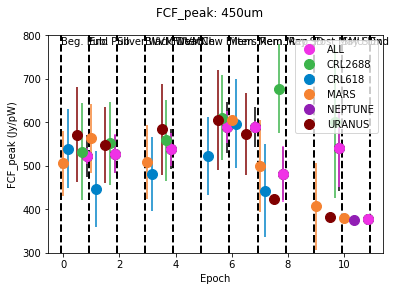


Epoch:  Beg. Pub.
FCF arcsec all =  4.62139227937834  +/-  0.3462917091360459  =  7.4932333851267074 %

Epoch:  End Pub.
FCF arcsec all =  4.631027560122722  +/-  0.3362680908547698  =  7.261198221974276 %

Epoch:  Silver WVM Dead
FCF arcsec all =  nan  +/-  nan  =  nan %

Epoch:  Black WVM
FCF arcsec all =  4.461300691423383  +/-  0.3304079055485114  =  7.406089129650089 %

Epoch:  Filter Ch.
FCF arcsec all =  nan  +/-  nan  =  nan %

Epoch:  New Filters
FCF arcsec all =  4.57327682013605  +/-  0.3798639587944352  =  8.306165879176644 %

Epoch:  Mem. Rem.
FCF arcsec all =  4.437565203897446  +/-  0.27892518643390446  =  6.285545645367165 %

Epoch:  Mem. Rep.
FCF arcsec all =  4.061233488871137  +/-  0.6391859365327781  =  15.738714316335617 %

Epoch:  May SD
FCF arcsec all =  nan  +/-  nan  =  nan %

Epoch:  Post May SD
FCF arcsec all =  3.957665296682226  +/-  0.5631397873060515  =  14.229090766673488 %

Epoch:  SMU Fix
FCF arcsec all =  3.3933446839674186  +/-  0.024162670761512062

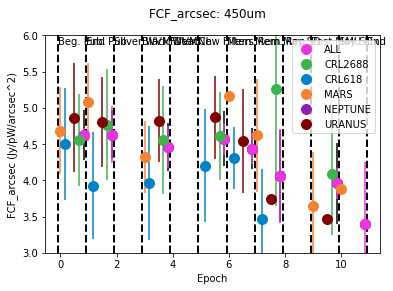


Epoch:  Beg. Pub.
FCF peak all =  537.09173091514  +/-  16.448611304892395  =  3.062532963757593 %

Epoch:  End Pub.
FCF peak all =  537.8982861566672  +/-  16.10071379387887  =  2.9932636351976423 %

Epoch:  Silver WVM Dead
FCF peak all =  nan  +/-  nan  =  nan %

Epoch:  Black WVM
FCF peak all =  544.8158441946094  +/-  18.476706803327293  =  3.391367376740125 %

Epoch:  Filter Ch.
FCF peak all =  nan  +/-  nan  =  nan %

Epoch:  New Filters
FCF peak all =  535.9946567841503  +/-  22.171109176553756  =  4.136442200669596 %

Epoch:  Mem. Rem.
FCF peak all =  483.69755195740305  +/-  12.350372854968787  =  2.5533254830399525 %

Epoch:  Mem. Rep.
FCF peak all =  513.1968376150537  +/-  21.49523897574649  =  4.188497940797904 %

Epoch:  May SD
FCF peak all =  nan  +/-  nan  =  nan %

Epoch:  Post May SD
FCF peak all =  608.8866858098011  +/-  65.93630283820701  =  10.828994027109282 %

Epoch:  SMU Fix
FCF peak all =  575.1010709326596  +/-  19.979172249280246  =  3.4740280029177115 %




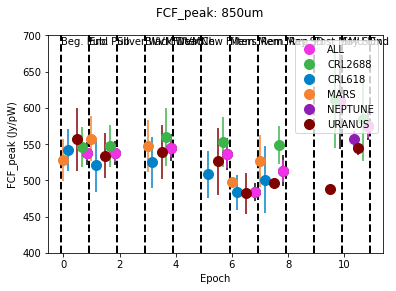


Epoch:  Beg. Pub.
FCF arcsec all =  2.300422239302897  +/-  0.050126558891656035  =  2.1790155752817806 %

Epoch:  End Pub.
FCF arcsec all =  2.2788835211353495  +/-  0.041762230100376496  =  1.8325741404971136 %

Epoch:  Silver WVM Dead
FCF arcsec all =  nan  +/-  nan  =  nan %

Epoch:  Black WVM
FCF arcsec all =  2.252794308926365  +/-  0.0493684920699589  =  2.1914336286425944 %

Epoch:  Filter Ch.
FCF arcsec all =  nan  +/-  nan  =  nan %

Epoch:  New Filters
FCF arcsec all =  2.152414976408949  +/-  0.059724470454111715  =  2.7747656055504204 %

Epoch:  Mem. Rem.
FCF arcsec all =  1.9847870758997008  +/-  0.0369476886390733  =  1.861544197244683 %

Epoch:  Mem. Rep.
FCF arcsec all =  2.124689035281855  +/-  0.07440646157198465  =  3.501993013397093 %

Epoch:  May SD
FCF arcsec all =  nan  +/-  nan  =  nan %

Epoch:  Post May SD
FCF arcsec all =  2.18713411116031  +/-  0.07946764258348596  =  3.633414255576997 %

Epoch:  SMU Fix
FCF arcsec all =  2.1505344645118156  +/-  0.0396819

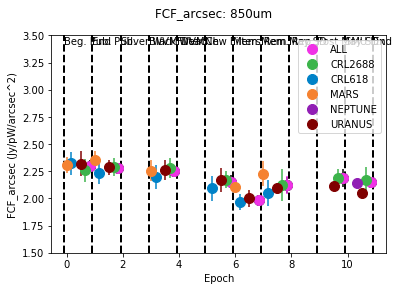

In [4]:
from FCFs_over_time import FCFs_over_time

FCFs_over_time(FCF_450_dict,wave='450')
FCFs_over_time(FCF_850_dict,wave='850')